In [ ]:
!pip install rbo
import rbo
import pickle
import os
import glob
import numpy as np
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from scipy.stats import kurtosis, skew
#from sklearn.metrics import plot_confusion_matrix

import seaborn as sns
import os
import pickle
import numpy as np
import cv2
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
from skimage.segmentation import quickshift, mark_boundaries
from skimage.measure import regionprops
import copy
import random
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from skimage import filters
import pandas as pd
import warnings
import tensorflow as tf
import pickle
from scipy.stats import kendalltau
import sys
import scipy.stats as stats
from scipy.stats import wilcoxon
import itertools
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from functools import partial
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

from matplotlib import pyplot as plt
import time
from sklearn.utils import resample
from scipy.stats import norm, gaussian_kde
from sklearn.neighbors import KernelDensity
import csv

import matplotlib.colors as mcolors
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, make_scorer

In [ ]:
print(xgb.__version__)
# Check if GPU is available
print(f"XGBoost with GPU support: {xgb.config_context()}")

2.1.1
XGBoost with GPU support: <contextlib._GeneratorContextManager object at 0x7e9f7bec4f10>


In [ ]:
#!pip install import tikzplotlib
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
import shutil
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import sem
from sklearn.metrics import roc_auc_score
import gc
import matplotlib as mpl

In [ ]:
# Install the msttcorefonts package to get Times New Roman
!apt-get install -y fonts-ubuntu fonts-msttcorefonts-installer

# Refresh the font cache
!fc-cache -fv
# List all installed fonts and check for 'Times New Roman'
!fc-list | grep "Times"

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-msttcorefonts-installer
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache d

In [ ]:
def remove_highly_correlated_features_pd(X, threshold):
    # Convert X to a pandas DataFrame
    # Calculate the correlation matrix
    df = pd.DataFrame(X)
    corr_matrix = df.corr().abs()
    # Create a mask to remove the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set the upper triangle values to NaN
    corr_matrix.mask(mask, inplace=True)

    # Find the highly correlated features
    cols_to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]

    # Drop the highly correlated features from the DataFrame
    reduced_df = df.drop(columns=cols_to_drop)

    # Convert the reduced DataFrame back to numpy array
    X_reduced = reduced_df.to_numpy()

    return X_reduced, cols_to_drop


def min_max_scaling1(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def exponential_weightage(x):
    center = 0.5
    steepness = 20.0
    decay_rate = 10.0
        # Calculate the penalty using mirrored Gaussian components
    left_gaussian = np.exp(-steepness * (x - center) ** 2)
    sample_weight = 1-left_gaussian
    return sample_weight

def min_max_scaling(x):
    # Check if x is a single value
    if isinstance(x, (int, float)):
        # If x is a single value, return 0 (or any other default value)
        return 0  # You can choose any default value here
    # If x is iterable (e.g., Pandas Series or NumPy array), apply min-max scaling
    min_val = np.min(x)
    max_val = np.max(x)
    scaled_values = (x - min_val) / (max_val - min_val)
    return scaled_values

def cor_to_01(x):
    return (x+1)/2


def populate_data(dataset_name, model_name, pp="pixel"):
  # Remove the directory if it exists
  if os.path.exists('res_sal_metrics'):
      shutil.rmtree('res_sal_metrics')

  # Create a new directory
  os.mkdir('res_sal_metrics')

  #build the src string
  if pp == "pixel":
    base_dir = "drive/MyDrive/PhD/Results/sanity/FRIES/res_sal_metrics/" # change just the dir name as needed
  elif pp == "patch":
    base_dir = "drive/MyDrive/PhD/Results/sanity/FRIES/res_sal_metrics_patch/" # change just the dir name as needed
  else:
    print("Error Unknown pp")
    return -1

  src_dir = base_dir + dataset_name + "/" + model_name + "/*.pkl"
  # Copy files from a specified source directory to the target directory
  source_files = glob.glob(src_dir)
  for file in source_files:
      shutil.copy(file, 'res_sal_metrics/') # dont change this

  print("Data populated from: " + src_dir)


def calculate_rocs_rf(X, y, df):
    roc_dict = {}
    threshold = 0.8

    # Define the pipeline with RandomForestClassifier and BorderlineSMOTE
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('scaler', MinMaxScaler()),  # Include scaling to handle feature variance
        ('classifier', RandomForestClassifier())
    ])

    # Define the parameter grid for RandomForest
    param_grid = {
        'classifier__n_estimators': [100, 200, 500],  # number of trees
        'classifier__max_depth': [None, 10, 20],      # maximum depth of the tree
        'classifier__min_samples_split': [2, 5, 10],  # minimum number of samples required to split an internal node
        'classifier__min_samples_leaf': [1, 2, 4],    # minimum number of samples required to be at a leaf node
        'classifier__bootstrap': [True, False],       # whether bootstrap samples are used when building trees
    }

    pert_types = ["IT", "IN", "U0", "U1", "U.5", "FR", "G3", "G9", "G15"]

    for pert_type in pert_types:
        df_pert_pair = df[df['pert_key_pair'].str.contains(pert_type)]
        df_pert_rest = df[~df['pert_key_pair'].str.contains(pert_type)]
        df_pert_pair.reset_index(drop=True, inplace=True)
        df_pert_rest.reset_index(drop=True, inplace=True)

        X_train = df_pert_rest[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2', 'prob_diffs_cor']]
        y_train = (df_pert_rest['cam_rank_target'] > 0.5).astype(int)
        X_train = X_train.dropna(axis=1, how='any')
        columns_to_keep = X_train.columns
        X_train, removed_feature_names = remove_highly_correlated_features_pd(X_train, threshold)

        X_train = pipeline.named_steps['scaler'].fit_transform(X_train)

        X_test = df_pert_pair[columns_to_keep]
        X_test = X_test.drop(columns=removed_feature_names)
        X_test = pipeline.named_steps['scaler'].transform(X_test)
        y_test = (df_pert_pair['cam_rank_target'] > 0.5).astype(int)

        # Grid search with cross-validation
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        y_prob_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob_test)
        roc_auc = auc(fpr, tpr)
        roc_dict[pert_type] = [grid_search.best_score_, roc_auc]
        print(f"{pert_type} : {grid_search.best_score_} : {roc_auc}")

    return roc_dict


def calculate_rocs_lgbm(X, y, df):
    roc_dict = {}
    threshold = 0.8

    # Define the pipeline with LGBMClassifier and BorderlineSMOTE
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('scaler', MinMaxScaler()),  # Ensure scaler is used properly
        ('classifier', LGBMClassifier())
    ])

    # Define the parameter grid for LightGBM
    param_grid = {
        'classifier__n_estimators': [200, 500, 800],
        'classifier__max_depth': [6, 9, 12],
        'classifier__learning_rate': [0.01, 0.1, 0.3],
        'classifier__colsample_bytree': [0.5, 0.75, 1.0],
    }

    pert_types = ["IT", "IN", "U0", "U1", "U.5", "FR", "G3", "G9", "G15"]

    for pert_type in pert_types:
        df_pert_pair = df[df['pert_key_pair'].str.contains(pert_type)]
        df_pert_rest = df[~df['pert_key_pair'].str.contains(pert_type)]
        df_pert_pair.reset_index(drop=True, inplace=True)
        df_pert_rest.reset_index(drop=True, inplace=True)

        X_train = df_pert_rest[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2', 'prob_diffs_cor']]
        y_train = (df_pert_rest['cam_rank_target'] > 0.5).astype(int)
        X_train = X_train.dropna(axis=1, how='any')
        columns_to_keep = X_train.columns
        X_train, removed_feature_names = remove_highly_correlated_features_pd(X_train, threshold)

        X_train = pipeline.named_steps['scaler'].fit_transform(X_train)

        X_test = df_pert_pair[columns_to_keep]
        X_test = X_test.drop(columns=removed_feature_names)
        X_test = pipeline.named_steps['scaler'].transform(X_test)
        y_test = (df_pert_pair['cam_rank_target'] > 0.5).astype(int)

        # Grid search with cross-validation
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
        grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        y_prob_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob_test)
        roc_auc = auc(fpr, tpr)
        roc_dict[pert_type] = [grid_search.best_score_, roc_auc]
        print(f"{pert_type} : {grid_search.best_score_} : {roc_auc}")

    return roc_dict


def calculate_rocs_xgb(X,y, df):

    roc_dict = {}
    threshold = 0.8
    # Define the pipeline
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('classifier', xgb.XGBClassifier())
    ])

    # Define the parameter grid
    param_grid = {
        'classifier__n_estimators': [500, 800],  # number of trees
        #'classifier__max_depth': [6, 9],
        'classifier__colsample_bytree': [0.5, 0.75],
        'classifier__reg_alpha': [0.1, 0.5],
        'classifier__reg_lambda': [0.1, 0.5],
    }

    grid_searches = []
    remove_perts = ["FR", "G3"]

    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    pert_types = ["IT", "IN", "U0", "U1", "U.5", "G9", "G15"] #["IT", "IN", "U0", "U1", "U.5", "FR", "G4", "G6", "G8"]
    pert_groups = [["IT", "IN"], ["U0","U1","U.5"], ["G9", "G15"]]
    pert_key_pairs = np.unique(df['pert_key_pair'])
    print(pert_key_pairs)
    #pert_key_pairs = pert_key_pairs[0:3]
    for pert_type in pert_types:
      df_pert_pair = df[df['pert_key_pair'].str.contains(pert_type)]
      df_pert_rest = df[~df['pert_key_pair'].str.contains(pert_type)]
      df_pert_pair.reset_index(drop=True, inplace=True)
      df_pert_rest.reset_index(drop=True, inplace=True)

      X = df_pert_rest[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2', 'prob_diffs_cor']] #'prob_diffs_cor',
      #X = df_pert_rest[['Similarity', 'arppd1', 'arppd2']] #'prob_diffs_cor',
      y = df_pert_rest['cam_rank_target']
      y = (y>0.5).astype(int)
      X = X.dropna(axis=1, how='any')
      columns_to_keep = X.columns
      X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, threshold)
      scaler = MinMaxScaler()
      X = scaler.fit_transform(X_reduced)

      X_test = df_pert_pair[columns_to_keep]
      #X_test = df_pert_pair[['Similarity', 'arppd1', 'arppd2']] #'prob_diffs_cor',
      X_test = X_test.drop(columns=removed_feature_names)
      #print(X_test.columns)
      X_test = scaler.transform(X_test)  # Use the same scaler fitted on training data
      y_test = df_pert_pair['cam_rank_target']
      y_test = (y_test>0.5).astype(int)

      #grid search
      cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
      grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
      grid_search.fit(X, y)

      y_prob_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
      fpr, tpr, _ = roc_curve(y_test, y_prob_test)
      roc_auc = auc(fpr, tpr)
      roc_dict[pert_type] = [grid_search.best_score_, roc_auc]
      print(f"{pert_type} : {grid_search.best_score_} : {roc_auc}")

    return roc_dict


def calculate_rocs_xgb_allpert(X,y, df, plot_title="plot", save_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots", pp="pixel", metric="faithfulness"):

    roc_dict = {}
    threshold = 0.8
    # Define the pipeline
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('classifier', xgb.XGBClassifier())
    ])

    # Define the parameter grid
    param_grid = {
        'classifier__n_estimators': [500, 800],  # number of trees
        #'classifier__max_depth': [6, 9],
        'classifier__colsample_bytree': [0.5, 0.75],
        'classifier__reg_alpha': [0.1, 0.5],
        'classifier__reg_lambda': [0.1, 0.5],
    }

    grid_searches = []
    remove_perts = ["FR", "G3"]

    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    pert_types = ["IT", "IN", "U0", "U1", "U.5", "G9", "G15"] #["IT", "IN", "U0", "U1", "U.5", "FR", "G4", "G6", "G8"]
    pert_groups = [["IT", "IN"], ["U0","U1","U.5"], ["G9", "G15"]]
    pert_key_pairs = np.unique(df['pert_key_pair'])

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2', 'prob_diffs_cor']] #'prob_diffs_cor',
    y = df['cam_rank_target']
    y = (y>0.5).astype(int)
    X = X.dropna(axis=1, how='any')
    columns_to_keep = X.columns
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, threshold)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y)

    # Retrieve the best parameters
    best_params = grid_search.best_params_

    # Now perform cross-validation using the best parameters to calculate ROC-AUC on each fold
    roc_aucs = []
    y = y.values if isinstance(y, pd.Series) else y
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model with the best parameters
        model = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
        model.fit(X_train, y_train)

        # Calculate ROC-AUC on the test set for each split
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        roc_aucs.append(roc_auc)

    # Calculate mean ROC-AUC and confidence interval
    mean_roc_auc = np.mean(roc_aucs)
    std_roc_auc = np.std(roc_aucs)
    ci = sem(roc_aucs) * 1.96  # 95% confidence interval

    # Store the result in the dictionary
    roc_dict['all_perturbations'] = mean_roc_auc
    print(f"Mean ROC-AUC: {mean_roc_auc}, 95% CI: ±{ci}")

    # Plot ROC-AUC values with confidence interval
    plt.figure(figsize=(10, 6))
    sns.histplot(roc_aucs, kde=True, color='blue', stat="density")
    plt.axvline(mean_roc_auc, color='r', linestyle='--', label=f'Mean ROC-AUC: {mean_roc_auc:.3f}')
    plt.axvline(mean_roc_auc - ci, color='g', linestyle='--', label=f'95% CI Lower: {mean_roc_auc - ci:.3f}')
    plt.axvline(mean_roc_auc + ci, color='g', linestyle='--', label=f'95% CI Upper: {mean_roc_auc + ci:.3f}')
    plt.title('ROC-AUC Distribution with 95% Confidence Interval')
    plt.xlabel('ROC-AUC')
    plt.ylabel('Density')
    plt.legend()
    plt.savefig(save_dir + "/" + 'roc_allperts_' + plot_title+ "_" + pp + "_" + metric + '.png', dpi=300, bbox_inches='tight')
    #plt.show()

    # Combine them into a dictionary
    data_to_save = {
        "roc_aucs": roc_aucs,
        "model": model,
        "cv": cv,
        "grid_search": grid_search
    }

    # Save the dictionary to a pkl file
    pkl_filename = save_dir + "/" + 'roc_allperts_' + plot_title+ "_" + pp + "_" + metric + '.pkl'
    with open(pkl_filename, 'wb') as f:
      pickle.dump(data_to_save, f)

    return 0

def calculate_rocs_xgb_allpert(X, y, df, plot_title="plot", save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_xgb", pp="pixel", metric="faithfulness"):

    roc_dict = {}
    threshold = 0.8

    # Define the pipeline
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('classifier', xgb.XGBClassifier())
    ])

    # Define the parameter grid
    param_grid = {
        'classifier__n_estimators': [500, 800],  # number of trees
        'classifier__colsample_bytree': [0.5, 0.75],
        'classifier__reg_alpha': [0.1, 0.5],
        'classifier__reg_lambda': [0.1, 0.5],
    }

    remove_perts = ["FR", "G3"]
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]
    y = df['cam_rank_target']
    y = (y > 0.5).astype(int)
    X = X.dropna(axis=1, how='any')
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, threshold)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y)

    # Retrieve the best parameters
    best_params = grid_search.best_params_

    # Now perform cross-validation using the best parameters to calculate ROC-AUC on each fold
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    y = y.values if isinstance(y, pd.Series) else y
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model with the best parameters
        model = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
        model.fit(X_train, y_train)

        # Calculate ROC-AUC on the test set for each split
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Calculate the mean and standard deviation of the true positive rates
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    # Plot the mean ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=0.8)

    # Plot the standard deviation of the ROC curves
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                     label=r'$\pm$ 1 std. dev.')

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {plot_title}')
    plt.legend(loc="lower right")
    plt.savefig(save_dir + "/" + 'roc_curve_' + plot_title + "_" + pp + "_" + metric + '.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Combine them into a dictionary
    data_to_save = {
        "roc_aucs": aucs,
        "model": model,
        "cv": cv,
        "grid_search": grid_search
    }

    # Save the dictionary to a pkl file
    pkl_filename = save_dir + "/" + 'roc_curve_' + plot_title + "_" + pp + "_" + metric + '.pkl'
    with open(pkl_filename, 'wb') as f:
        pickle.dump(data_to_save, f)

    return 0


def get_XY(metric = "faithfulness", sal_met_dir = 'res_sal_metrics/'):

  #sal_met_dir = 'res_sal_metrics/'#'res_cams/oxpets/xception/' #"res_sal_resnet_oxpets/"

  files = os.listdir(sal_met_dir)

  f1_scores_0 = []
  f1_scores_1 = []

  model = None
  class_threshold = None

  if metric == "faithfulness":
    dict_idx = 0
  elif metric == "aopc":
    dict_idx = 2
  else:
    print("Uknown Metric")
    return

  tr_files = files[0:500]
  data_arr = []
  for file in tr_files:
      file_path = sal_met_dir + file
      with open(file_path, 'rb') as f:
          data = pickle.load(f)
      faithfulness_dict = data[dict_idx] # 0 for faithfulness and 2 for aopc
      prob_diff_dict = data[3]

      cam_ranks_dict = {}
      arppd_dict = {}
      for key in faithfulness_dict.keys():
          cam_indices= np.argsort(np.array(list(faithfulness_dict[key].values())).flatten())[::-1]
          cam_ranks = np.array(list(faithfulness_dict[key].keys()))[cam_indices]
          #print(key + str(" : ") + str(cam_ranks))
          cam_ranks_dict[key] = cam_ranks
          prob_diffs = prob_diff_dict[key]
          arppd_dict[key] = len(prob_diffs[prob_diffs>=0])/len(prob_diffs)

      cam_res_dict = {}
      for key1, key2 in itertools.combinations(cam_ranks_dict.keys(), 2):
          similarity = rbo.RankingSimilarity(list(cam_ranks_dict[key1]), list(cam_ranks_dict[key2])).rbo_ext(p=0.2)
          # print(f"RBO similarity between {key1} and {key2}: {similarity}")
          res_key = key1 + '_' + key2
          cam_res_dict[res_key] = similarity

      for key1, key2 in itertools.combinations(prob_diff_dict.keys(), 2):
          similarity = rbo.RankingSimilarity(list(np.argsort(prob_diff_dict[key1])[::-1]),
                                            list(np.argsort(prob_diff_dict[key2])[::-1])).rbo_ext(p=0.2)
          # print(f"Perturbation Pixel RBO similarity between {key1} and {key2}: {similarity}")
          res_key = key1 + '_' + key2
          arppd1= arppd_dict[key1]
          arppd2=arppd_dict[key2]

          var1 = np.var(prob_diff_dict[key1])
          var2 = np.var(prob_diff_dict[key2])
          med1 = np.mean(prob_diff_dict[key1])
          med2 = np.mean(prob_diff_dict[key2])
          mu1 = np.mean(prob_diff_dict[key1])
          mu2 = np.mean(prob_diff_dict[key2])
          kurt1 = kurtosis(prob_diff_dict[key1])
          kurt2 =  kurtosis(prob_diff_dict[key2])
          skew1 = skew(prob_diff_dict[key1])
          skew2 = skew(prob_diff_dict[key2])
          #cv1 = var1/mu1
          #cv2 = var2/mu2

          if np.isnan(var1) or np.isnan(var2):
              print("var nan")

          # Check if both variables have zero variance
          if var1 == 0 and var2 == 0:
              prob_diffs_cor = 1  # Assign correlation coefficient as 1 if both have no variance
          elif var1 == 0 or var2 == 0:
              prob_diffs_cor = 0  # Assign correlation coefficient as 0 if one has no variance
          else:
              # Calculate the correlation coefficient using np.corrcoef
              prob_diffs_cor = np.corrcoef(prob_diff_dict[key1], prob_diff_dict[key2])[0, 1]

          if np.isnan(prob_diffs_cor):
              print("Nan")

          cam_rank_target = cam_res_dict[res_key]
          data_arr.append([res_key, similarity, arppd1, arppd2, prob_diffs_cor, var1, var2, med1, med2, mu1, mu2, kurt1, kurt2, skew1, skew2, cam_rank_target])

  df = pd.DataFrame(data_arr, columns=['pert_key_pair','Similarity', 'arppd1', 'arppd2', 'prob_diffs_cor', 'var1', 'var2','med1','med2', 'mu1', 'mu2','kurt1','kurt2',
                                      'skew1', 'skew2', 'cam_rank_target'])
  X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2','prob_diffs_cor', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2']] #'prob_diffs_cor',
  y = df['cam_rank_target']
  y = (y>0.5).astype(int)

  return X, y, df

def calculate_rocs_xgb_modelagnostic(X,y, df):

    roc_dict = {}
    threshold = 0.8
    # Define the pipeline
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('classifier', xgb.XGBClassifier())
    ])

    # Define the parameter grid
    param_grid = {
        'classifier__n_estimators': [500, 800],  # number of trees
        #'classifier__max_depth': [6, 9],
        'classifier__colsample_bytree': [0.5, 0.75],
        'classifier__reg_alpha': [0.1, 0.5],
        'classifier__reg_lambda': [0.1, 0.5],
    }

    grid_searches = []
    remove_perts = ["FR", "G3"]

    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2', 'prob_diffs_cor']] #'prob_diffs_cor',
    #X = df_pert_rest[['Similarity', 'arppd1', 'arppd2']] #'prob_diffs_cor',
    y = df['cam_rank_target']
    y = (y>0.5).astype(int)
    X = X.dropna(axis=1, how='any')
    columns_to_keep = X.columns
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, threshold)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)
    #grid search
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y)

    # Now perform cross-validation using the best parameters to calculate ROC-AUC on each fold
    best_params = grid_search.best_params_
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    y = y.values if isinstance(y, pd.Series) else y
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model with the best parameters
        model = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
        model.fit(X_train, y_train)

        # Calculate ROC-AUC on the test set for each split
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

    # Calculate the mean and standard deviation of the true positive rates
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    model.fit(X,y)

    return model, columns_to_keep, removed_feature_names, scaler, mean_auc

def evaluate_modelagnostic(model, model_name, dataset_name, columns_to_keep, removed_feature_names, pp, metric, scaler):

  can_model_names = [m for m in model_names if m != model_name]
  remove_perts = ["FR", "G3"]
  auc_roc_dict = {}
  for can_model_name in can_model_names:
    populate_data(dataset_name, can_model_name, pp=pp)  # Adjusted to use variables from loops
    X, y, df = get_XY(metric=metric)
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]
    X = df[columns_to_keep]
    X = X.drop(columns=removed_feature_names)
    X = scaler.transform(X)  # Use the same scaler fitted on training data
    y = df['cam_rank_target']
    y = (y>0.5).astype(int)

    ##evaluation
    y_prob = model.predict_proba(X)[:, 1]  # Assuming binary classification
    roc_auc = roc_auc_score(y, y_prob)
    auc_roc_dict[can_model_name] = roc_auc
    ##evaluation
    del X, y, df

  return auc_roc_dict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline  # Use imblearn's Pipeline to handle SMOTE only for RF
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

def calculate_rocs_rf_allpert(df, plot_title, save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/", pp="pixel", metric="faithfulness"):

    roc_dict = {}
    threshold = 0.8

    # Define the pipeline
    pipeline = Pipeline([
        ('borderline_smote', BorderlineSMOTE()),
        ('classifier', RandomForestClassifier())
    ])

    # Define the parameter grid
    param_grid = {
        'classifier__max_depth': [6, 8, 10],  # depth of trees
        'classifier__min_samples_split': [5, 10, 15],
        'classifier__min_samples_leaf': [2, 4, 6]
    }

    remove_perts = ["FR", "G3"]
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]
    y = df['cam_rank_target']
    y = (y > 0.5).astype(int)
    X = X.dropna(axis=1, how='any')
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, threshold)
    columns_to_keep = [col for col in X.columns if col not in removed_feature_names]
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y)

    # Retrieve the best parameters
    best_params = grid_search.best_params_

    # Now perform cross-validation using the best parameters to calculate ROC-AUC on each fold
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fprs = []
    tpr_list = []
    feature_importances = []

    y = y.values if isinstance(y, pd.Series) else y
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model with the best parameters
        model = RandomForestClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
        model.fit(X_train, y_train)

        # Calculate ROC-AUC on the test set for each split
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        fprs.append(fpr)
        tpr_list.append(tpr)

        # Save feature importances
        importance = model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': columns_to_keep,
            'Importance': importance
        }).sort_values(by='Importance', ascending=False)
        feature_importances.append(importance_df)

    # Calculate the mean and standard deviation of the true positive rates
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    # Save the ROC curve data and feature importances to a pickle file
    data_to_save = {
        "mean_fpr": mean_fpr,
        "mean_tpr": mean_tpr,
        "tprs": tprs,
        "aucs": aucs,
        "fprs": fprs,
        "tpr_list": tpr_list,
        "best_params": best_params,
        "feature_importances": feature_importances,
        "cv": cv
    }

    pkl_filename = save_dir + "/" + 'roc_curve_rf_' + plot_title + "_" + pp + "_" + metric + '.pkl'
    with open(pkl_filename, 'wb') as f:
        pickle.dump(data_to_save, f)

    # Plot the mean ROC curve
    plt.figure(figsize=(10, 8))
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=0.8)

    # Plot the standard deviation of the ROC curves
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                     label=r'$\pm$ 1 std. dev.')

    # Plot settings
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {plot_title}')
    plt.legend(loc="lower right")
    plt.savefig(save_dir + "/" + 'roc_curve_rf_' + plot_title + "_" + pp + "_" + metric + '.png', dpi=300, bbox_inches='tight')
    plt.show()

    return 0

In [ ]:
import os
import numpy as np
import pandas as pd
import pickle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RepeatedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import xgboost as xgb

def calculate_rmse_xgb_allpert(df, plot_title="plot", save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/xgb_regression", pp="pixel", metric="faithfulness"):

    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('regressor', xgb.XGBRegressor())
    ])

    # Define the parameter grid
    param_grid = {
        'regressor__n_estimators': [500, 800],  # number of trees
        'regressor__colsample_bytree': [0.5, 0.75],
        'regressor__reg_alpha': [0.1, 0.5],
        'regressor__reg_lambda': [0.1, 0.5],
    }

    remove_perts = ["FR", "G3"]
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]
    y = df['cam_rank_target']
    X = X.dropna(axis=1, how='any')

    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    # Retrieve the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Calculate RMSE for each of the 50 splits using the best model
    rmses = cross_val_score(best_model, X, y, cv=cv, scoring='neg_root_mean_squared_error', n_jobs=-1)
    rmses = -rmses  # Convert scores to positive RMSE values

    # Plot settings for feature importances after fitting the best model to the entire dataset
    best_model.named_steps['regressor'].fit(X, y)  # Retrain on the entire dataset to get feature importances

    # Get feature importance
    importance = best_model.named_steps['regressor'].get_booster().get_score(importance_type='weight')
    importance_df = pd.DataFrame(list(importance.items()), columns=['Feature', 'Importance']).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    importance_df.plot(kind='bar', x='Feature', y='Importance', color='blue', legend=None)
    plt.title(f'Feature Importance - {plot_title}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.tight_layout()
    plt.savefig(os.path.join(save_dir, f'feature_importance_{plot_title}_{pp}_{metric}.png'), dpi=300)
    plt.show()
    plt.close()

    # Save the results
    results_to_save = {
        "rmse_per_split": rmses,
        "mean_rmse": np.mean(rmses),
        "std_rmse": np.std(rmses),
        "model": best_model,
        "cv": cv,
        "grid_search": grid_search,
        "feature_importance": importance_df
    }

    pkl_filename = os.path.join(save_dir, f'rmse_results_{plot_title}_{pp}_{metric}.pkl')
    with open(pkl_filename, 'wb') as f:
        pickle.dump(results_to_save, f)

    return np.mean(rmses), np.std(rmses)

In [ ]:
#build models with best rocs with all dataset model pairs
model_names = ["xception", "resnet50", "inception_v3"]
dataset_names = ["pvoc", "oxpets", "imagenette"]
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]
save_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/xgb_regression" #"/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/"
xy_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/XY/"

for pp in pps:
  for metric in metrics:
    for dataset_name in dataset_names:
        for model_name in model_names:
          csv_filename = xy_dir + pp + "_" + metric + "_" + dataset_name + "_" + model_name + ".csv"
          df = pd.read_csv(csv_filename)
          plot_title = dataset_name + "_" + model_name
          #calculate_rocs_rf_allpert(df, plot_title=plot_title, pp=pp, metric=metric)
          calculate_rmse_xgb_allpert(df, plot_title=plot_title, pp=pp, metric=metric, save_dir=save_dir)

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


                 Generalized Linear Model Regression Results                  
Dep. Variable:        cam_rank_target   No. Observations:                 7350
Model:                            GLM   Df Residuals:                     7337
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4335.9
Date:                Mon, 23 Sep 2024   Deviance:                       6692.5
Time:                        20:05:00   Pearson chi2:                 5.69e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1019
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7179      0.079     -9.

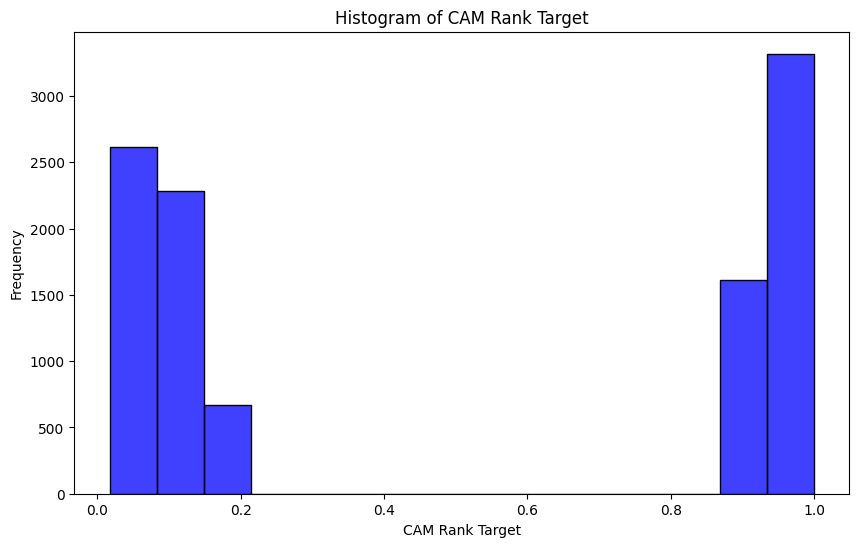

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming xy_dir is already defined, let's say:
# xy_dir = "/path/to/your/data/"

csv_filename = xy_dir + 'pixel' + "_" + 'faithfulness' + "_" + 'pvoc' + "_" + 'resnet50' + ".csv"
df = pd.read_csv(csv_filename)

remove_perts = ["FR", "G3"]
df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]
X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]
y = df['cam_rank_target']
X = X.dropna(axis=1, how='any')

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add a constant to the training and testing feature sets to include an intercept in the model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Create the GLM model with a Binomial family and a logit link function
model = sm.GLM(y_train, X_train, family=sm.families.Binomial(sm.families.links.logit()))

# Fit the model
results = model.fit()

# Print out the results
print(results.summary())

# Make predictions on the test set
predictions = results.predict(X_test)  # These are in the form of probabilities

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# Optional: Convert predictions to a dataframe for easier handling
predictions_df = pd.DataFrame({
    'Predicted_Probabilities': predictions,
    'Actual Values': y_test
})

plt.figure(figsize=(10, 6))  # Set the size of the figure
sns.histplot(df['cam_rank_target'], kde=False, color='blue')  # kde=False if you do not want the density estimate line
plt.title('Histogram of CAM Rank Target')  # Add a title to the histogram
plt.xlabel('CAM Rank Target')  # Label the x-axis
plt.ylabel('Frequency')  # Label the y-axis
plt.savefig('test.png')
plt.show()  # Display the plot

In [ ]:
import matplotlib as mpl

## generate plots with just 1 plot per roc
def generate_plots(pkl_filename, dataset_name, model_name, pp, metric, save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/feature_importance/"):
  with open(pkl_filename, 'rb') as file:
    data = pickle.load(file)

  plot_title = dataset_name + "_" + model_name.replace("_", "") + "_"  + pp + "_" + metric # convert inception_v3 to inceptionv3 and keep others same
  save_img_path = save_dir + 'final_roc_' + plot_title + '.png'
  if os.path.exists(save_img_path):
    return 0

  cv = data["cv"]
  grid_search = data["grid_search"]
  #model = grid_search.best_estimator_
  best_params = grid_search.best_params_

  populate_data(dataset_name, model_name, pp)
  X, y, df = get_XY(metric=metric)
  remove_perts = ["FR", "G3"]
  df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

  X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1','med2','mu1','mu2','kurt1','kurt2','skew1', 'skew2', 'prob_diffs_cor']] #'prob_diffs_cor',
  y = df['cam_rank_target']
  y = (y>0.5).astype(int)
  X = X.dropna(axis=1, how='any')
  columns_to_keep = X.columns
  X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, 0.8)
  columns_to_keep = columns_to_keep.drop(removed_feature_names)
  scaler = MinMaxScaler()
  X = scaler.fit_transform(X_reduced)

  best_params = grid_search.best_params_
  tprs = []
  aucs = []
  mean_fpr = np.linspace(0, 1, 100)
  feature_importances = []
  y = y.values if isinstance(y, pd.Series) else y
  for train_idx, test_idx in cv.split(X, y):
      X_train, X_test = X[train_idx], X[test_idx]
      y_train, y_test = y[train_idx], y[test_idx]

      # Train the model with the best parameters
      model = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
      smote = BorderlineSMOTE()
      X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
      model.fit(X_train_resampled, y_train_resampled)

      # Calculate ROC-AUC on the test set for each split
      y_prob = model.predict_proba(X_test)[:, 1]
      fpr, tpr, _ = roc_curve(y_test, y_prob)
      interp_tpr = np.interp(mean_fpr, fpr, tpr)
      interp_tpr[0] = 0.0
      tprs.append(interp_tpr)
      roc_auc = auc(fpr, tpr)
      aucs.append(roc_auc)

      ### feature importance
      # Get feature importance
      importance = model.get_booster().get_score(importance_type='gain')

      # Convert to DataFrame
      importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])

      # Map the feature indices to their names using the final columns_to_keep
      importance_df['Feature'] = importance_df['Feature'].apply(lambda x: columns_to_keep[int(x[1:])])

      # Sort the DataFrame by importance
      importance_df = importance_df.sort_values(by='Importance', ascending=False)
      #print(importance_df)
      ### feature importance
      feature_importances.append(importance_df)

  pkl_filename = save_img_path.replace('.png', '.pkl')

  with open(pkl_filename, 'wb') as file:
    pickle.dump(feature_importances, file)

  # Calculate the mean and standard deviation of the true positive rates
  mean_tpr = np.mean(tprs, axis=0)
  mean_tpr[-1] = 1.0
  mean_auc = auc(mean_fpr, mean_tpr)
  std_auc = np.std(aucs)

  mpl.rcParams['font.family'] = 'Liberation Serif'
  mpl.rcParams['font.size'] = 15
  mpl.rcParams['font.weight'] = 'bold'

  plt.figure(figsize=(5, 5))
  plt.plot(mean_fpr, mean_tpr, color='b',
            label=r' %0.3f $\pm$ %0.3f' % (mean_auc, std_auc),
            lw=4, alpha=0.8)

  # Plot the standard deviation of the ROC curves
  std_tpr = np.std(tprs, axis=0)
  tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
  tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
  plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, lw=4)

  # Plot settings
  plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r', alpha=0.8)
  plt.xlim([-0.05, 1.05])
  plt.ylim([-0.05, 1.05])
  plt.xlabel('FPR', fontsize=20)
  plt.ylabel('TPR', fontsize=20)
  plt.legend(loc="lower right", fontsize=20)
  plt.savefig(save_img_path, dpi=300, bbox_inches='tight')

  del X, y, df, scaler

In [ ]:
#final version which saves all info for roc plots later

def generate_plots(pkl_filename, dataset_name, model_name, pp, metric, save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/3in1/",
                   xy_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/XY/", is_perm_test=False):
    with open(pkl_filename, 'rb') as file:
        data = pickle.load(file)

    plot_title = dataset_name + "_" + model_name.replace("_", "") + "_" + pp + "_" + metric  # convert inception_v3 to inceptionv3 and keep others same
    if is_perm_test == False:
      save_img_path = save_dir + 'pt_roc_' + plot_title + '.png'
    else:
      save_img_path = save_dir + 'final_roc_' + plot_title + '.png'

    if os.path.exists(save_img_path):
        return 0

    cv = data["cv"]
    grid_search = data["grid_search"]
    best_params = grid_search.best_params_

    #populate_data(dataset_name, model_name, pp)
    #X, y, df = get_XY(metric=metric)
    csv_filename = xy_dir + pp + "_" + metric + "_" + dataset_name + "_" + model_name + ".csv"
    df = pd.read_csv(csv_filename)

    remove_perts = ["FR", "G3"]
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]  # 'prob_diffs_cor',
    y = df['cam_rank_target']
    y = (y > 0.5).astype(int)

    if is_perm_test == True:
      y = np.random.permutation(y)

    X = X.dropna(axis=1, how='any')
    columns_to_keep = X.columns
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, 0.8)
    columns_to_keep = columns_to_keep.drop(removed_feature_names)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)

    best_params = grid_search.best_params_
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    all_fprs = []
    all_tprs = []
    feature_importances = []

    y = y.values if isinstance(y, pd.Series) else y
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model with the best parameters
        model = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
        smote = BorderlineSMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model.fit(X_train_resampled, y_train_resampled)

        # Calculate ROC-AUC on the test set for each split
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        all_fprs.append(fpr)
        all_tprs.append(tpr)

        # Get feature importance
        importance = model.get_booster().get_score(importance_type='gain')
        importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
        importance_df['Feature'] = importance_df['Feature'].apply(lambda x: columns_to_keep[int(x[1:])])
        importance_df = importance_df.sort_values(by='Importance', ascending=False)
        feature_importances.append(importance_df)

    pkl_filename = save_img_path.replace('.png', '.pkl')

    # Save the relevant data for future ROC plots
    roc_data_to_save = {
        "mean_fpr": mean_fpr,
        "mean_tpr": np.mean(tprs, axis=0),
        "tprs": tprs,
        "aucs": aucs,
        "fprs": all_fprs,
        "tprs": all_tprs,
        "feature_importances": feature_importances,
    }

    with open(pkl_filename, 'wb') as file:
        pickle.dump(roc_data_to_save, file)

    # Calculate the mean and standard deviation of the true positive rates
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    mpl.rcParams['font.family'] = 'Liberation Serif'
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.weight'] = 'bold'

    plt.figure(figsize=(5, 5))
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r' %0.3f $\pm$ %0.3f' % (mean_auc, std_auc),
             lw=4, alpha=0.8)

    # Plot the standard deviation of the ROC curves
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, lw=4)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r', alpha=0.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR', fontsize=20)
    plt.ylabel('TPR', fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.savefig(save_img_path, dpi=300, bbox_inches='tight')

    del X, y, df, scaler


def generate_plots_rf(pkl_filename, dataset_name, model_name, pp, metric, save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/3in1/",
                   xy_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/XY/", is_perm_test=False):
    with open(pkl_filename, 'rb') as file:
        data = pickle.load(file)

    plot_title = dataset_name + "_" + model_name.replace("_", "") + "_" + pp + "_" + metric  # convert inception_v3 to inceptionv3 and keep others same
    if is_perm_test == False:
      save_img_path = save_dir + 'pt_roc_' + plot_title + '.png'
    else:
      save_img_path = save_dir + 'final_roc_' + plot_title + '.png'

    if os.path.exists(save_img_path):
        return 0

    #grid_search = data["grid_search"]
    best_params = data['best_params']

    #populate_data(dataset_name, model_name, pp)
    #X, y, df = get_XY(metric=metric)
    csv_filename = xy_dir + pp + "_" + metric + "_" + dataset_name + "_" + model_name + ".csv"
    df = pd.read_csv(csv_filename)

    remove_perts = ["FR", "G3"]
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]  # 'prob_diffs_cor',
    y = df['cam_rank_target']
    y = (y > 0.5).astype(int)

    if is_perm_test == True:
      y = np.random.permutation(y)

    X = X.dropna(axis=1, how='any')
    columns_to_keep = X.columns
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, 0.8)
    columns_to_keep = columns_to_keep.drop(removed_feature_names)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    #splits = list(cv.split(X, y))

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    all_fprs = []
    all_tprs = []
    feature_importances = []

    y = y.values if isinstance(y, pd.Series) else y
    for train_idx, test_idx in cv.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # Train the model with the best parameters
        model = RandomForestClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
        smote = BorderlineSMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
        model.fit(X_train_resampled, y_train_resampled)

        # Calculate ROC-AUC on the test set for each split
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        all_fprs.append(fpr)
        all_tprs.append(tpr)

        # Get feature importance
        #importance = model.get_booster().get_score(importance_type='gain')
        #importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
        #importance_df['Feature'] = importance_df['Feature'].apply(lambda x: columns_to_keep[int(x[1:])])
        #importance_df = importance_df.sort_values(by='Importance', ascending=False)
        #feature_importances.append(importance_df)

    pkl_filename = save_img_path.replace('.png', '.pkl')

    # Save the relevant data for future ROC plots
    roc_data_to_save = {
        "mean_fpr": mean_fpr,
        "mean_tpr": np.mean(tprs, axis=0),
        "tprs": tprs,
        "aucs": aucs,
        "fprs": all_fprs,
        "tprs": all_tprs,
        #"feature_importances": feature_importances,
        "cv": cv
    }

    with open(pkl_filename, 'wb') as file:
        pickle.dump(roc_data_to_save, file)

    # Calculate the mean and standard deviation of the true positive rates
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    mpl.rcParams['font.family'] = 'Liberation Serif'
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.weight'] = 'bold'

    plt.figure(figsize=(5, 5))
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r' %0.3f $\pm$ %0.3f' % (mean_auc, std_auc),
             lw=4, alpha=0.8)

    # Plot the standard deviation of the ROC curves
    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, lw=4)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r', alpha=0.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR', fontsize=20)
    plt.ylabel('TPR', fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.savefig(save_img_path, dpi=300, bbox_inches='tight')

    del X, y, df, scaler

In [ ]:
#permutation test with n shuffles final version
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
import xgboost as xgb
import os
import matplotlib as mpl

# Function to generate ROC plots
def generate_plots_pt(pkl_filename, dataset_name, model_name, pp, metric, save_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/3in1/",
                   xy_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/XY/", num_shuffles=10, is_perm_test=False):
    with open(pkl_filename, 'rb') as file:
        data = pickle.load(file)

    plot_title = dataset_name + "_" + model_name.replace("_", "") + "_" + pp + "_" + metric
    if is_perm_test == False:
        save_img_path = save_dir + 'pt_roc_' + plot_title + '.png'
    else:
        save_img_path = save_dir + 'final_roc_' + plot_title + '.png'

    if os.path.exists(save_img_path):
        return 0

    cv = data["cv"]
    grid_search = data["grid_search"]
    best_params = grid_search.best_params_

    # Load the data
    csv_filename = xy_dir + pp + "_" + metric + "_" + dataset_name + "_" + model_name + ".csv"
    df = pd.read_csv(csv_filename)

    remove_perts = ["FR", "G3"]
    df = df[~df['pert_key_pair'].str.contains('|'.join(remove_perts))]

    X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2', 'med1', 'med2', 'mu1', 'mu2', 'kurt1', 'kurt2', 'skew1', 'skew2', 'prob_diffs_cor']]
    y = df['cam_rank_target']
    y = (y > 0.5).astype(int)

    X = X.dropna(axis=1, how='any')
    columns_to_keep = X.columns
    X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, 0.8)
    columns_to_keep = columns_to_keep.drop(removed_feature_names)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X_reduced)

    best_params = grid_search.best_params_

    # Initialize lists to store information for each shuffle
    shuffle_data = []

    for shuffle_idx in range(num_shuffles):
        # Shuffle the labels if it's a permutation test
        if is_perm_test:
            y_shuffled = np.random.permutation(y)
        else:
            y_shuffled = y.copy()

        tprs = []
        aucs = []
        mean_fpr = np.linspace(0, 1, 100)
        all_fprs = []
        all_tprs = []
        feature_importances = []

        y_shuffled = y_shuffled.values if isinstance(y_shuffled, pd.Series) else y_shuffled

        for train_idx, test_idx in cv.split(X, y_shuffled):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y_shuffled[train_idx], y_shuffled[test_idx]

            # Train the model with the best parameters
            #model = xgb.XGBClassifier(**{k.split('__')[1]: v for k, v in best_params.items()})
            # Train the model with the updated GPU settings
            model = xgb.XGBClassifier(tree_method='hist', device='cuda', **{k.split('__')[1]: v for k, v in best_params.items()})
            smote = BorderlineSMOTE()
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            model.fit(X_train_resampled, y_train_resampled)

            # Calculate ROC-AUC on the test set for each split
            y_prob = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            interp_tpr = np.interp(mean_fpr, fpr, tpr)
            interp_tpr[0] = 0.0
            tprs.append(interp_tpr)
            roc_auc = auc(fpr, tpr)
            aucs.append(roc_auc)

            all_fprs.append(fpr)
            all_tprs.append(tpr)

            # Get feature importance
            importance = model.get_booster().get_score(importance_type='gain')
            importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
            importance_df['Feature'] = importance_df['Feature'].apply(lambda x: columns_to_keep[int(x[1:])])
            importance_df = importance_df.sort_values(by='Importance', ascending=False)
            feature_importances.append(importance_df)

        # Save the relevant data for this shuffle
        shuffle_data.append({
            "mean_fpr": mean_fpr,
            "mean_tpr": np.mean(tprs, axis=0),
            "tprs": tprs,
            "aucs": aucs,
            "fprs": all_fprs,
            "tprs_list": all_tprs,
            "feature_importances": feature_importances
        })

    pkl_filename = save_img_path.replace('.png', '_shuffles.pkl')

    # Save the shuffle data to a pickle file
    with open(pkl_filename, 'wb') as file:
        pickle.dump(shuffle_data, file)

    # Calculate and plot the average ROC curve for the original (or permutation) data
    mean_tprs = [np.mean(shuffle['mean_tpr'], axis=0) for shuffle in shuffle_data]
    overall_mean_tpr = np.mean(mean_tprs, axis=0)
    overall_mean_auc = auc(mean_fpr, overall_mean_tpr)
    overall_std_auc = np.std([np.mean(shuffle['aucs']) for shuffle in shuffle_data])

    mpl.rcParams['font.family'] = 'Liberation Serif'
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.weight'] = 'bold'

    plt.figure(figsize=(5, 5))
    plt.plot(mean_fpr, overall_mean_tpr, color='b',
             label=r' %0.3f $\pm$ %0.3f' % (overall_mean_auc, overall_std_auc),
             lw=4, alpha=0.8)

    # Plot the standard deviation of the ROC curves
    std_tpr = np.std(mean_tprs, axis=0)
    tprs_upper = np.minimum(overall_mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(overall_mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, lw=4)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='r', alpha=0.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('FPR', fontsize=20)
    plt.ylabel('TPR', fontsize=20)
    plt.legend(loc="lower right", fontsize=20)
    plt.savefig(save_img_path, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

    del X, y, df, scaler

In [ ]:
#save all X and y in df csv
model_names = ["xception", "resnet50", "inception_v3"]
dataset_names = ["pvoc", "oxpets", "imagenette"]
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]
pkl_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots/"
save_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/XY/"

for pp in pps:
  for metric in metrics:
    for dataset_name in dataset_names:
        for model_name in model_names:
            populate_data(dataset_name, model_name, pp)
            X, y, df = get_XY(metric=metric)
            csv_filename = save_dir + pp + "_" + metric + "_" + dataset_name + "_" + model_name + ".csv"
            df.to_csv(csv_filename, index=False)
            print(csv_filename)
            del df, X, y
            gc.collect()

In [ ]:
#build models with best rocs with all dataset model pairs
model_names = ["xception", "resnet50", "inception_v3"]
dataset_names = ["pvoc", "oxpets", "imagenette"]
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]
pkl_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/"
save_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/permutation_test_rf/" #"/content/drive/MyDrive/PhD/Results/sanity/FRIES/3in1_xgb/"

for pp in pps:
  for metric in metrics:
    for dataset_name in dataset_names:
        for model_name in model_names:
            pkl_filename = pkl_dir + "roc_curve_rf_" + dataset_name + "_" + model_name + "_" + pp + "_" + metric + ".pkl"
            print(pkl_filename)
            generate_plots_rf(pkl_filename, dataset_name, model_name, pp, metric, save_dir, is_perm_test=True)

In [ ]:
pkl_filename = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_inception_v3_patch_aopc.pkl"
with open(pkl_filename, 'rb') as file:
  data = pickle.load(file)
data.keys()

dict_keys(['mean_fpr', 'mean_tpr', 'tprs', 'aucs', 'fprs', 'tpr_list', 'best_params', 'feature_importances'])

In [ ]:
data['best_params']

{'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 2,
 'classifier__min_samples_split': 5}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

def create_subplots(metric, dataset_names, model_names, pkl_files, save_path):
    """
    Create a plot with 6 subplots for the specified metric, datasets, and models.
    Each subplot contains ROC-AUC values for the actual and permuted models.

    Args:
    - metric: The metric to be used (e.g., "aopc" or "faithfulness").
    - dataset_names: List of dataset names (e.g., ["pvoc", "oxpets", "imagenette"]).
    - model_names: List of model names (e.g., ["xception", "resnet50", "inception_v3"]).
    - pkl_files: Dictionary mapping (dataset_name, model_name) to their corresponding pkl files.
    - save_path: Path to save the generated plot.
    """

    # Define colors for each model
    model_colors = {
        "xception": "blue",
        "resnet50": "green",
        "inception_v3": "orange"
    }

    # Create a figure with 6 subplots (2 rows, 3 columns)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f"ROC-AUC for {metric} Metric", fontsize=16)

    # Loop through datasets and models to create subplots
    for i, dataset_name in enumerate(dataset_names):
        for j, model_name in enumerate(model_names):
            ax = axes[j, i]  # Get the current subplot
            color = model_colors[model_name]

            # Load actual and permuted model data
            actual_pkl_file = pkl_files[(dataset_name, model_name, metric, 'actual')]
            permuted_pkl_file = pkl_files[(dataset_name, model_name, metric, 'permuted')]

            # Load actual data
            with open(actual_pkl_file, 'rb') as file:
                actual_data = pickle.load(file)
                actual_mean = np.mean(actual_data["aucs"])
                actual_min = np.min(actual_data["aucs"])
                actual_max = np.max(actual_data["aucs"])

            # Load permuted data
            with open(permuted_pkl_file, 'rb') as file:
                permuted_data = pickle.load(file)
                permuted_mean = np.mean(permuted_data["aucs"])
                permuted_min = np.min(permuted_data["aucs"])
                permuted_max = np.max(permuted_data["aucs"])

            # Plot actual model performance
            ax.errorbar(1, actual_mean, yerr=[[actual_mean - actual_min], [actual_max - actual_mean]],
                        fmt='o', color=color, label=f'{model_name} Actual')

            # Plot permuted model performance
            ax.errorbar(2, permuted_mean, yerr=[[permuted_mean - permuted_min], [permuted_max - permuted_mean]],
                        fmt='o', color=color, linestyle='--', label=f'{model_name} Permuted')

            # Customize subplot
            ax.set_xticks([1, 2])
            ax.set_xticklabels(['Actual', 'Permuted'])
            ax.set_title(f'{dataset_name} - {model_name}')

    # Add common labels and legend
    fig.text(0.5, 0.04, 'Model Type', ha='center', fontsize=14)
    fig.text(0.04, 0.5, 'ROC-AUC', va='center', rotation='vertical', fontsize=14)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=3, fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(save_path)
    plt.show()

# Example usage:
# Assume we have pkl_files dictionary that maps (dataset_name, model_name, metric, type) to the path of the pkl file.
# The 'type' is 'actual' for original models and 'permuted' for permuted datasets.
# pkl_files = {('pvoc', 'xception', 'aopc', 'actual'): 'path_to_pkl', ... }

# Placeholder for actual pkl files dictionary
pkl_files = {
    ('pvoc', 'xception', 'aopc', 'actual'): 'path_to_actual_pvoc_xception_aopc.pkl',
    ('pvoc', 'xception', 'aopc', 'permuted'): 'path_to_permuted_pvoc_xception_aopc.pkl',
    # Add other file paths accordingly
}

# Create a plot for a specific metric
create_subplots('aopc', dataset_names, model_names, pkl_files, 'roc_auc_aopc.png')

In [ ]:
!rm -rf plots_xgb permutation_test_xgb

!mkdir plots_xgb
!cp /content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/*.pkl plots_xgb/

!mkdir permutation_test_xgb
!cp /content/drive/MyDrive/PhD/Results/sanity/FRIES/permutation_test_rf/*.pkl permutation_test_xgb/

model_roc_dir = "plots_xgb/"

model_roc_files = [f for f in os.listdir(model_roc_dir) if f.endswith('.pkl')]
# Rename files in the model_roc_dir
for file in model_roc_files:
    if "inception_v3" in file:
        new_file_name = file.replace("inception_v3", "inceptionv3")
        os.rename(os.path.join(model_roc_dir, file), os.path.join(model_roc_dir, new_file_name))


directory= "plots_xgb/"
pattern_to_remove="roc_curve_rf_"
# Loop through all files in the directory
for filename in os.listdir(directory):
    if pattern_to_remove in filename:
        # Create the new filename by removing the pattern
        new_filename = filename.replace(pattern_to_remove, "")
        # Construct full file paths
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_file, new_file)
        print(f"Renamed: {old_file} to {new_file}")

directory= "permutation_test_xgb/"
pattern_to_remove="final_roc_"
# Loop through all files in the directory
for filename in os.listdir(directory):
    if pattern_to_remove in filename:
        # Create the new filename by removing the pattern
        new_filename = filename.replace(pattern_to_remove, "")
        # Construct full file paths
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_filename)
        # Rename the file
        os.rename(old_file, new_file)
        print(f"Renamed: {old_file} to {new_file}")

In [ ]:
import os

model_roc_dir = "plots_xgb/"
null_roc_dir = "permutation_test_xgb/" #"/content/drive/MyDrive/PhD/Results/sanity/FRIES/3in1_xgb/"

# List all pkl files in each directory
model_roc_files = [f for f in os.listdir(model_roc_dir) if f.endswith('.pkl')]
null_roc_files = [f for f in os.listdir(null_roc_dir) if f.endswith('.pkl')]

print("Model ROC files:", model_roc_files)
print("Null ROC files:", null_roc_files)

Model ROC files: ['oxpets_xception_patch_faithfulness.pkl', 'imagenette_inceptionv3_pixel_aopc.pkl', 'pvoc_resnet50_pixel_aopc.pkl', 'oxpets_resnet50_pixel_aopc.pkl', 'oxpets_resnet50_patch_faithfulness.pkl', 'oxpets_xception_pixel_faithfulness.pkl', 'pvoc_inceptionv3_patch_aopc.pkl', 'imagenette_resnet50_pixel_faithfulness.pkl', 'imagenette_resnet50_patch_faithfulness.pkl', 'pvoc_resnet50_patch_aopc.pkl', 'oxpets_resnet50_pixel_faithfulness.pkl', 'oxpets_inceptionv3_patch_faithfulness.pkl', 'imagenette_xception_patch_faithfulness.pkl', 'pvoc_xception_pixel_aopc.pkl', 'pvoc_inceptionv3_pixel_aopc.pkl', 'imagenette_inceptionv3_pixel_faithfulness.pkl', 'imagenette_inceptionv3_patch_faithfulness.pkl', 'imagenette_xception_patch_aopc.pkl', 'pvoc_xception_patch_faithfulness.pkl', 'pvoc_resnet50_patch_faithfulness.pkl', 'pvoc_xception_patch_aopc.pkl', 'pvoc_resnet50_pixel_faithfulness.pkl', 'imagenette_xception_pixel_aopc.pkl', 'pvoc_inceptionv3_pixel_faithfulness.pkl', 'oxpets_xception_patc

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

def plot_3in1_with_errorbars(actual_pkl_files, permuted_pkl_files, save_filename):
    mpl.rcParams['font.family'] = 'Liberation Serif'
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.weight'] = 'bold'

    colors = ['blue', 'green', 'orange']
    labels = ['Xception', 'Resnet50', 'Inception_V3']

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(4, 3))

    # Loop through models
    for i, (actual_pkl_file, permuted_pkl_file, color, label) in enumerate(zip(actual_pkl_files, permuted_pkl_files, colors, labels)):
        # Load the data from the actual .pkl file
        with open(actual_pkl_file, 'rb') as file:
            actual_data = pickle.load(file)
            actual_aucs = actual_data['roc_aucs']
            actual_mean = np.mean(actual_aucs)
            actual_min = np.min(actual_aucs)
            actual_max = np.max(actual_aucs)

        # Load the data from the permuted .pkl file
        with open(permuted_pkl_file, 'rb') as file:
            permuted_data = pickle.load(file)
            perm_aucs = permuted_data['aucs']
            perm_mean = np.mean(perm_aucs)
            perm_min = np.min(perm_aucs)
            perm_max = np.max(perm_aucs)

        # Plot actual model performance
        ax.errorbar(i + 1, actual_mean, yerr=[[actual_mean - actual_min], [actual_max - actual_mean]],
                    fmt='o', color=color, capsize=5, label=label)

        # Plot permuted model performance
        ax.errorbar(i + 1, perm_mean, yerr=[[perm_mean - perm_min], [perm_max - perm_mean]],
                    fmt='x', color=color, linestyle='--', capsize=5)
        # Overlay another marker for the permuted model
        ax.plot(i + 1, perm_mean, 'o', color=color, markersize=8, fillstyle='none')

    # Customize the plot
    ax.set_xticks([1, 2, 3])
    #ax.axhline(0.8, color='gray', linestyle='--')  # Corrected this line
    ax.set_xticklabels(labels)
    ax.set_ylabel('ROC-AUC', fontweight='bold')
    #ax.set_title('Comparison of Actual and Permuted Model ROC-AUC')

    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

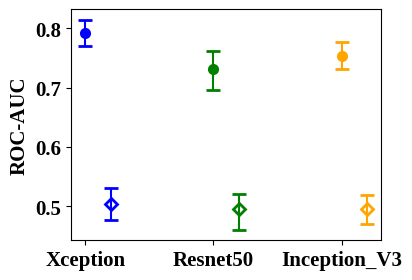

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

def plot_3in1_with_errorbars(actual_pkl_files, permuted_pkl_files, save_filename):
    mpl.rcParams['font.family'] = 'Liberation Serif'
    mpl.rcParams['font.size'] = 15
    mpl.rcParams['font.weight'] = 'bold'

    colors = ['blue', 'green', 'orange']
    labels = ['Xception', 'Resnet50', 'Inception_V3']

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(4, 3))

    # Loop through models
    for i, (actual_pkl_file, permuted_pkl_file, color, label) in enumerate(zip(actual_pkl_files, permuted_pkl_files, colors, labels)):
        # Load the data from the actual .pkl file
        with open(actual_pkl_file, 'rb') as file:
            actual_data = pickle.load(file)
            actual_aucs = actual_data['aucs']
            actual_mean = np.mean(actual_aucs)
            actual_min = np.min(actual_aucs)
            actual_max = np.max(actual_aucs)

        # Load the data from the permuted .pkl file
        with open(permuted_pkl_file, 'rb') as file:
            permuted_data = pickle.load(file)
            perm_aucs = permuted_data['aucs']
            perm_mean = np.mean(perm_aucs)
            perm_min = np.min(perm_aucs)
            perm_max = np.max(perm_aucs)

        # Plot actual model performance
        ax.errorbar(i + 1, actual_mean, yerr=[[actual_mean - actual_min], [actual_max - actual_mean]],
                    fmt='o', color=color, capsize=5, label=f'{label} Actual', markersize=6, markeredgewidth=2)

        # Plot permuted model performance with a different marker
        ax.errorbar(i + 1 + 0.2, perm_mean, yerr=[[perm_mean - perm_min], [perm_max - perm_mean]],
                    fmt='D', color=color, linestyle='--', capsize=5, markersize=6, markerfacecolor='none', markeredgewidth=2)

    # Add custom legend handles for the marker types
    actual_handle = plt.Line2D([], [], color='black', marker='o', linestyle='None', markersize=4, label='IE Model ROC')
    perm_handle = plt.Line2D([], [], color='black', marker='D', linestyle='None', markersize=4, markerfacecolor='none', label='Permutation Test ROC')

    # Add the legend for marker types
    #ax.legend(handles=[actual_handle, perm_handle], loc='center', fontsize=10)

    # Customize the plot
    ax.set_xticks([1, 2, 3])
    ax.set_xticklabels(labels)
    ax.set_ylabel('ROC-AUC', fontweight='bold')

    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage:
# Define your pkl file paths
actual_pkl_files = [
    'plots_xgb/imagenette_xception_patch_faithfulness.pkl',
    'plots_xgb/imagenette_inceptionv3_patch_faithfulness.pkl',
    'plots_xgb/imagenette_resnet50_patch_faithfulness.pkl'
]

permuted_pkl_files = [
    'permutation_test_xgb/imagenette_xception_patch_faithfulness.pkl',
    'permutation_test_xgb/imagenette_inceptionv3_patch_faithfulness.pkl',
    'permutation_test_xgb/imagenette_resnet50_patch_faithfulness.pkl'
]

# Test call
plot_3in1_with_errorbars(actual_pkl_files, permuted_pkl_files, 'roc_auc_comparison.png')

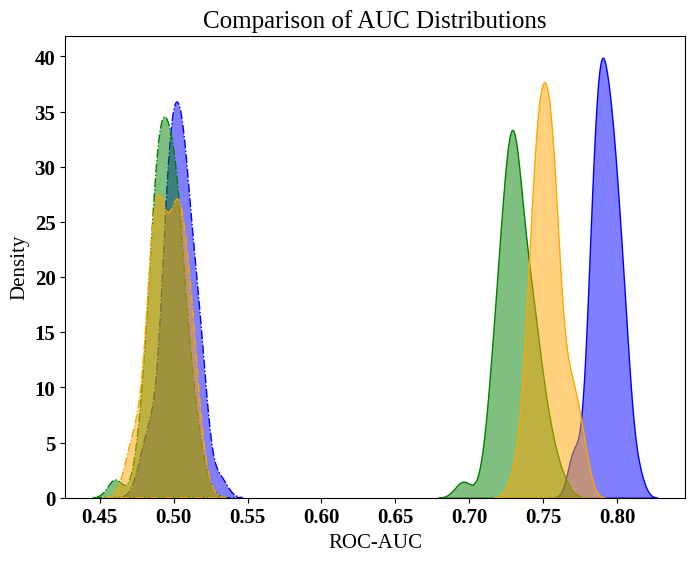

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import pandas as pd

def plot_3in1_with_kde_plots(actual_pkl_files, permuted_pkl_files, save_filename):
    plt.rcParams['font.family'] = 'Liberation Serif'
    plt.rcParams['font.size'] = 15
    plt.rcParams['font.weight'] = 'bold'

    colors = ['blue', 'green', 'orange']
    labels = ['Xception', 'Resnet50', 'Inception_V3']
    line_styles = {'Actual': '-', 'Permuted': '-.'}  # Define line styles for actual and permuted

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(8, 6))

    # Collect all data for KDE
    data = []
    categories = []

    # Loop through models
    for actual_pkl, permuted_pkl, color, label in zip(actual_pkl_files, permuted_pkl_files, colors, labels):
        # Load the data from the actual .pkl file
        with open(actual_pkl, 'rb') as file:
            actual_data = pickle.load(file)
            actual_aucs = actual_data['aucs']
            data.extend(actual_aucs)
            categories.extend([f'{label} Actual'] * len(actual_aucs))

        # Load the data from the permuted .pkl file
        with open(permuted_pkl, 'rb') as file:
            permuted_data = pickle.load(file)
            perm_aucs = permuted_data['aucs']
            data.extend(perm_aucs)
            categories.extend([f'{label} Permuted'] * len(perm_aucs))

    # Create DataFrame for plotting
    df = pd.DataFrame({
        'AUC': data,
        'Category': categories
    })

    # Plot KDE for each category
    unique_categories = pd.unique(df['Category'])
    for category in unique_categories:
        subset = df[df['Category'] == category]
        is_actual = 'Actual' in category
        style = line_styles['Actual'] if is_actual else line_styles['Permuted']
        sns.kdeplot(subset['AUC'], ax=ax, label=category, color=colors[labels.index(category.split()[0])], linestyle=style, fill=True, common_norm=False, alpha=0.5)

    # Customize the plot
    ax.set_xlabel('ROC-AUC')
    ax.set_ylabel('Density')
    ax.set_title('Comparison of AUC Distributions')
    #ax.legend(title='Model and Data Type')

    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage:
actual_pkl_files = [
    'plots_xgb/imagenette_xception_patch_faithfulness.pkl',
    'plots_xgb/imagenette_inceptionv3_patch_faithfulness.pkl',
    'plots_xgb/imagenette_resnet50_patch_faithfulness.pkl'
]
permuted_pkl_files = [
    'permutation_test_xgb/imagenette_xception_patch_faithfulness.pkl',
    'permutation_test_xgb/imagenette_inceptionv3_patch_faithfulness.pkl',
    'permutation_test_xgb/imagenette_resnet50_patch_faithfulness.pkl'
]
save_filename = 'roc_auc_kde_comparison.png'

plot_3in1_with_kde_plots(actual_pkl_files, permuted_pkl_files, save_filename)

In [ ]:
pkl_dir = '/content/drive/MyDrive/PhD/Results/sanity/FRIES/xgb_regression/'

pkl_files = os.listdir(pkl_dir)
pkl_files

In [ ]:
with open(pkl_dir + 'rmse_results_pvoc_xception_patch_faithfulness.pkl', 'rb') as file:
  data = pickle.load(file)

data['rmse_per_split']

array([0.34528736, 0.34282274, 0.34907111, 0.34320393, 0.35170713,
       0.34013207, 0.34453004, 0.34672985, 0.35131961, 0.35283936,
       0.34212125, 0.33720593, 0.3440961 , 0.34403205, 0.34925059,
       0.34305239, 0.34175076, 0.34401534, 0.35434354, 0.34681006,
       0.34407641, 0.34228113, 0.34763309, 0.34664379, 0.34588771,
       0.33604435, 0.34708096, 0.33856591, 0.34618229, 0.34726796,
       0.35813769, 0.34923034, 0.34432109, 0.35106479, 0.34920135,
       0.33972561, 0.34855   , 0.34568495, 0.33969034, 0.35132003,
       0.34176189, 0.3322457 , 0.35021424, 0.35214116, 0.33995321,
       0.34285563, 0.35084891, 0.34689004, 0.34148164, 0.34770365])

In [ ]:
#plot all error curves with each model as different colors
model_names = ["xception", "resnet50", "inceptionv3"]
dataset_names = ["pvoc", "oxpets", "imagenette"]
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]
model_roc_dir = "plots_xgb/"
null_roc_dir = "permutation_test_xgb/"

pkl_filenames = os.listdir(model_roc_dir)
pkl_filenames = [filename for filename in os.listdir(model_roc_dir) if filename.endswith('.pkl')]
for pp in pps:
  for metric in metrics:
    for dataset_name in dataset_names:
      actual_filenames_dataset = [
        os.path.join(model_roc_dir, filename)
        for filename in pkl_filenames
          if pp in filename and metric in filename and dataset_name in filename]
      print(actual_filenames_dataset)
      pt_filenames_dataset = [
        os.path.join(null_roc_dir, filename)
        for filename in pkl_filenames
          if pp in filename and metric in filename and dataset_name in filename]
      print(pt_filenames_dataset)
      plot_name = "plots_final/" + pp + "_" + metric + "_" + dataset_name + ".png"
      plot_3in1_with_errorbars(actual_filenames_dataset, pt_filenames_dataset, plot_name)
      del pt_filenames_dataset, actual_filenames_dataset

FileNotFoundError: [Errno 2] No such file or directory: 'plots_xgb/'

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def make_final_errplot_pp(png_files, save_filename, plots_dir="/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_final/"):
    dataset_name_dict = {
        "pvoc": "Pascal VOC 2007",
        "oxpets": "Oxford IIIT Pets",
        "imagenette": "Imagenette"
    }

    png_files = [os.path.join(plots_dir, filename) for filename in png_files]

    # Define colors and labels for the legend
    colors = ['blue', 'green', 'orange']
    labels = ['Xception', 'Resnet50', 'Inception_V3']

    # Create a 3x2 grid of subplots
    fig, axs = plt.subplots(2, 3, figsize=(15, 9))

    # Flatten the axes array for easy iteration
    axs = axs.flatten()

    # Loop through each subplot and display the image
    for i, png_file in enumerate(png_files):
        img = mpimg.imread(png_file)
        axs[i].imshow(img)
        axs[i].axis('off')  # Hide the axes for a cleaner look
        metric = (png_file.split('_')[-2]).upper()
        dataset_name = png_file.split('_')[-1].replace('.png', '')
        axs[i].set_title(metric + ' - ' + dataset_name_dict[dataset_name], fontsize=18, fontweight='bold')

    # Adding the markers to the legend with different colors
    for color, label in zip(colors, labels):
        plt.plot([], [], 'o', color=color, label=f'IE model ({label}) ROC-AUC', markersize=10)
        plt.plot([], [], 'D', color=color, label=f'PT Model ({label}) ROC-AUC', markersize=10)

    # Positioning the legend at the lower center relative to the whole figure
    fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3, fontsize=20, frameon=False)

    # Adjust the layout and increase the space between subplots
    plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust the spacing as needed

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom spacing to make room for the legend

    # Save the plot
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    plt.show()

['pixel_aopc_pvoc.png', 'pixel_aopc_oxpets.png', 'pixel_aopc_imagenette.png', 'pixel_faithfulness_pvoc.png', 'pixel_faithfulness_oxpets.png', 'pixel_faithfulness_imagenette.png']
###############


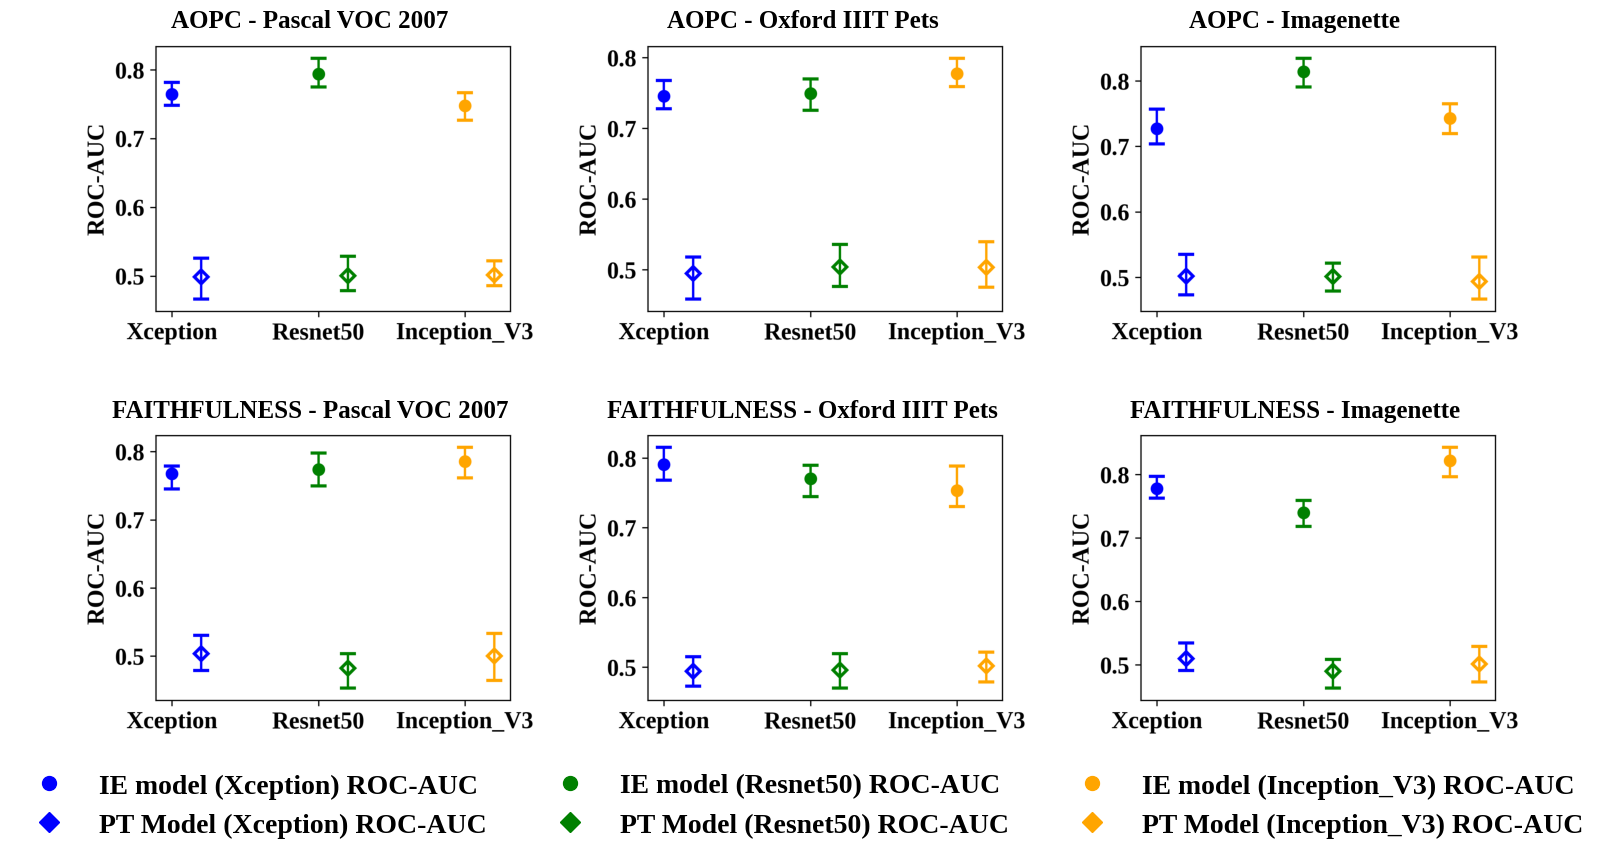

['patch_aopc_pvoc.png', 'patch_aopc_oxpets.png', 'patch_aopc_imagenette.png', 'patch_faithfulness_pvoc.png', 'patch_faithfulness_oxpets.png', 'patch_faithfulness_imagenette.png']
###############


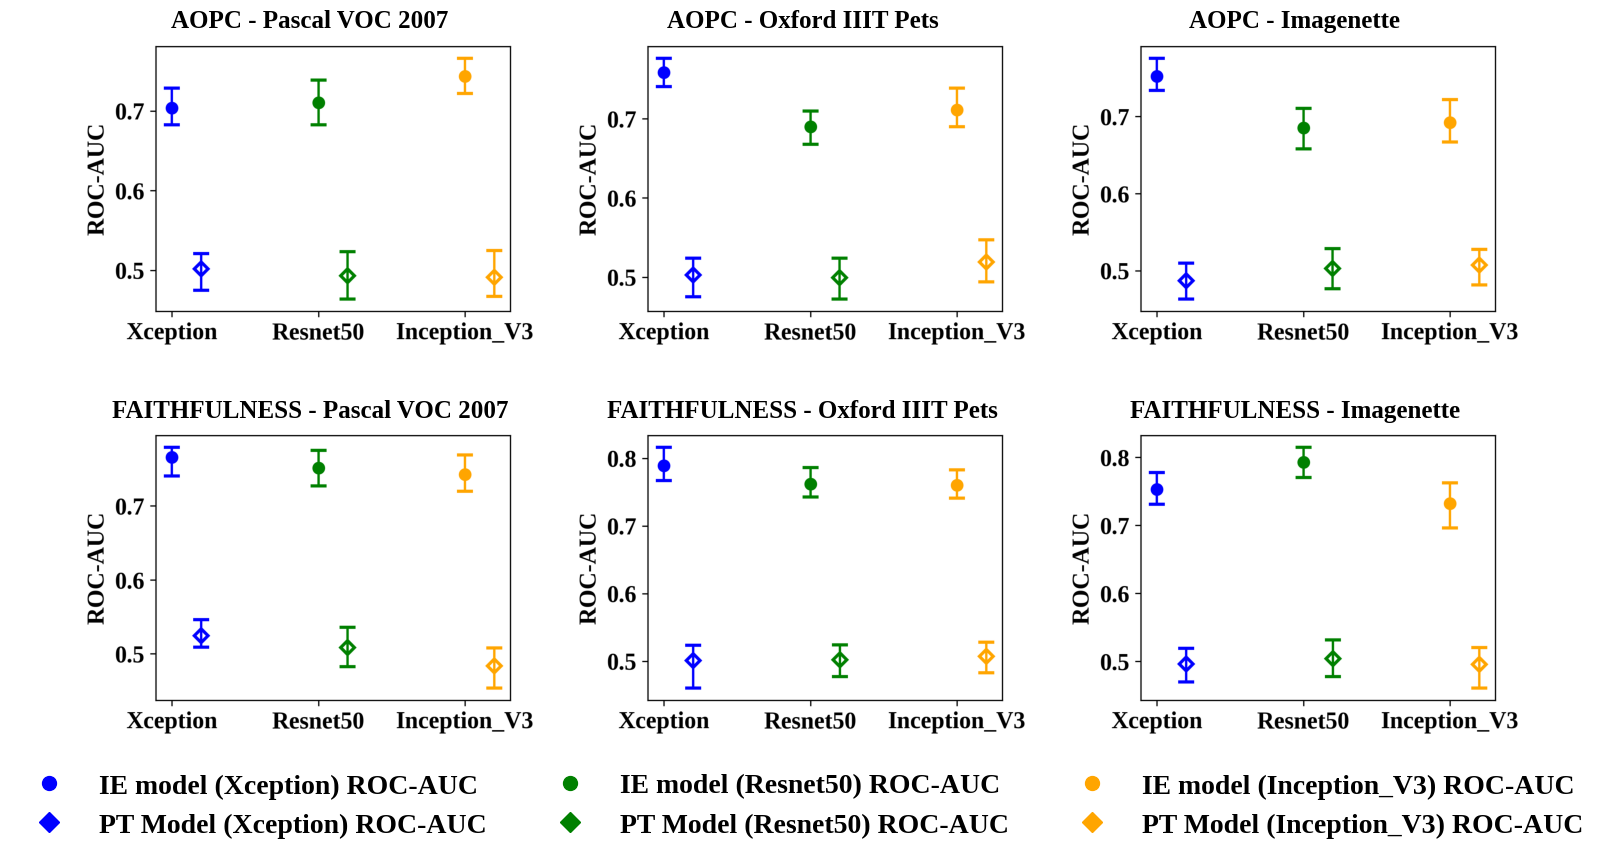

In [ ]:
plots_dir = "plots_final/"
files = os.listdir(plots_dir)
pps = ["pixel", "patch"]
dataset_order = {"pvoc": 0, "oxpets": 1, "imagenette": 2}

for pp in pps:
  png_files = [filename for filename in files if pp in filename]
  png_files = sorted(png_files, key=lambda x: (x.split('_')[1], dataset_order[x.split('_')[2].split('.')[0]]))

  print(png_files)
  print("###############")
  save_filename = "rf_pt_" + pp + ".png"
  make_final_errplot_pp(png_files, save_filename, plots_dir = "plots_final/")

In [ ]:
model_names = ["xception", "resnet50", "inceptionv3"]
dataset_names = ["pvoc", "oxpets", "imagenette"]
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]
model_roc_dir = "plots_xgb/"
null_roc_dir = "permutation_test_xgb/"

pkl_filenames = os.listdir(model_roc_dir)
pkl_filenames = [filename for filename in os.listdir(model_roc_dir) if filename.endswith('.pkl')]
for pp in pps:
  for metric in metrics:
    for dataset_name in dataset_names:
      actual_filenames_dataset = [
        os.path.join(model_roc_dir, filename)
        for filename in pkl_filenames
          if pp in filename and metric in filename and dataset_name in filename]
      print(actual_filenames_dataset)
      pt_filenames_dataset = [
        os.path.join(null_roc_dir, filename)
        for filename in pkl_filenames
          if pp in filename and metric in filename and dataset_name in filename]
      print(pt_filenames_dataset)
      plot_name = pp + "_" + metric + "_" + dataset_name + ".png"
      with open(actual_filenames_dataset[0], 'rb') as file:
        actual_data = pickle.load(file)
      actual_aucs = actual_data['roc_aucs']
      print(np.mean(actual_aucs))

['plots_xgb/pvoc_resnet50_pixel_aopc.pkl', 'plots_xgb/pvoc_xception_pixel_aopc.pkl', 'plots_xgb/pvoc_inceptionv3_pixel_aopc.pkl']
['permutation_test_xgb/pvoc_resnet50_pixel_aopc.pkl', 'permutation_test_xgb/pvoc_xception_pixel_aopc.pkl', 'permutation_test_xgb/pvoc_inceptionv3_pixel_aopc.pkl']
0.8506538299218039
['plots_xgb/oxpets_resnet50_pixel_aopc.pkl', 'plots_xgb/oxpets_inceptionv3_pixel_aopc.pkl', 'plots_xgb/oxpets_xception_pixel_aopc.pkl']
['permutation_test_xgb/oxpets_resnet50_pixel_aopc.pkl', 'permutation_test_xgb/oxpets_inceptionv3_pixel_aopc.pkl', 'permutation_test_xgb/oxpets_xception_pixel_aopc.pkl']
0.8494617545731127
['plots_xgb/imagenette_inceptionv3_pixel_aopc.pkl', 'plots_xgb/imagenette_xception_pixel_aopc.pkl', 'plots_xgb/imagenette_resnet50_pixel_aopc.pkl']
['permutation_test_xgb/imagenette_inceptionv3_pixel_aopc.pkl', 'permutation_test_xgb/imagenette_xception_pixel_aopc.pkl', 'permutation_test_xgb/imagenette_resnet50_pixel_aopc.pkl']
0.7881309999769432
['plots_xgb/pvoc

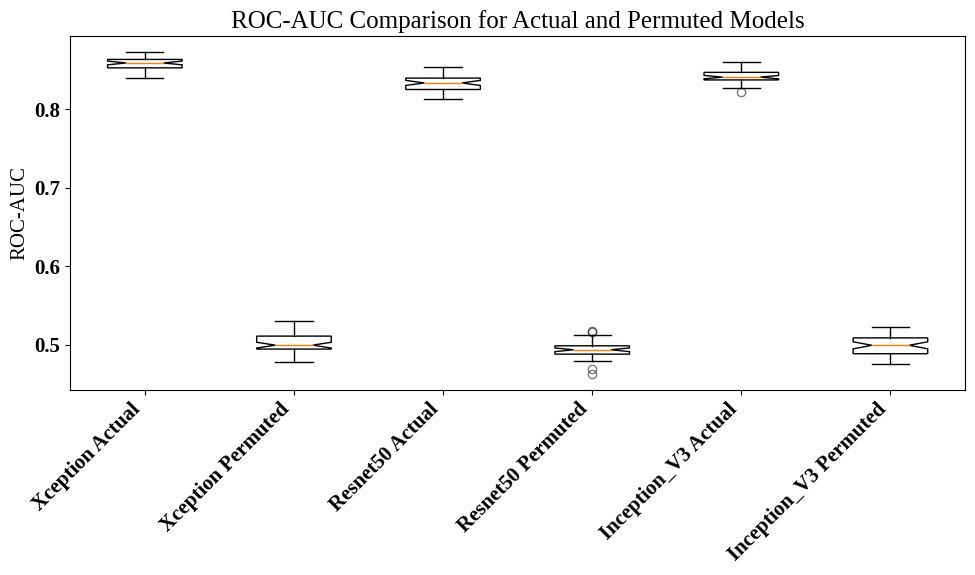

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

def plot_roc_auc_boxplots(actual_pkl_files, permuted_pkl_files, save_filename):
    colors = ['blue', 'green', 'orange']
    labels = ['Xception', 'Resnet50', 'Inception_V3']

    # Initialize the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    all_data = []

    # Loop through models
    for i, (actual_pkl_file, permuted_pkl_file, color, label) in enumerate(zip(actual_pkl_files, permuted_pkl_files, colors, labels)):
        # Load the data from the actual .pkl file
        with open(actual_pkl_file, 'rb') as file:
            actual_data = pickle.load(file)
            actual_aucs = actual_data['roc_aucs']

        # Load the data from the permuted .pkl file
        with open(permuted_pkl_file, 'rb') as file:
            permuted_data = pickle.load(file)
            perm_aucs = permuted_data['aucs']

        # Append data for box plot
        all_data.append(actual_aucs)
        all_data.append(perm_aucs)

    # Plotting box plots
    ax.boxplot(all_data, patch_artist=True, notch=True,
               boxprops=dict(facecolor='white', color='black'),
               capprops=dict(color='black'),
               whiskerprops=dict(color='black'),
               flierprops=dict(marker='o', color='black', alpha=0.5))

    # Setting labels and titles
    xtick_labels = []
    for label in labels:
        xtick_labels.append(f'{label} Actual')
        xtick_labels.append(f'{label} Permuted')

    ax.set_xticks(range(1, len(xtick_labels) + 1))
    ax.set_xticklabels(xtick_labels, rotation=45, ha='right')
    ax.set_ylabel('ROC-AUC')
    ax.set_title('ROC-AUC Comparison for Actual and Permuted Models')

    plt.tight_layout()
    plt.savefig(save_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Example usage:
# Define your pkl file paths
actual_pkl_files = [
    model_roc_dir + 'oxpets_xception_patch_faithfulness.pkl',
    model_roc_dir + 'oxpets_inceptionv3_patch_faithfulness.pkl',
    model_roc_dir + 'oxpets_resnet50_patch_faithfulness.pkl'
]

permuted_pkl_files = [
    null_roc_dir + 'oxpets_xception_patch_faithfulness.pkl',
    null_roc_dir + 'oxpets_inceptionv3_patch_faithfulness.pkl',
    null_roc_dir + 'oxpets_resnet50_patch_faithfulness.pkl'
]

# Call the function with the pkl files
plot_roc_auc_boxplots(actual_pkl_files, permuted_pkl_files, 'roc_auc_comparison_boxplot.png')

In [ ]:
with open("permutation_test_xgb/oxpets_xception_patch_faithfulness.pkl", 'rb') as file:
            actual_data = pickle.load(file)

len(actual_data['aucs'])

50

In [ ]:
#Make 3X3 Plots from all individual plots i.e. 9 rocs per metric-pp pair
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import os

# Configure font properties
mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 15
mpl.rcParams['font.weight'] = 'bold'

# Define the lists and labels
display_column_labels = ["Xception", "Resnet50", "Inception_v3"]
filename_column_labels = [ "xception", "resnet50", "inceptionv3"]

display_row_labels = ["Oxford-IIIT Pets", "Imagenette", "PASCAL VOC2007"]
filename_row_labels = ["oxpets", "imagenette", "pvoc"]

perturbation_types = ["patch", "pixel"]
metrics = ["aopc", "faithfulness"]

# Assuming all images are in the current directory or specify the correct path
base_path = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_final"

# Function to generate a 3x3 plot
def create_plot(perturbation, metric):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    for i, row_label in enumerate(filename_row_labels):
        for j, col_label in enumerate(filename_column_labels):
            filename = f"final_roc_{row_label}_{col_label}_{perturbation}_{metric}.png"
            filepath = os.path.join(base_path, filename)

            if os.path.exists(filepath):
                img = mpimg.imread(filepath)
                axs[i, j].imshow(img)
                axs[i, j].axis('off')  # Hide the axes for a cleaner look

                # Add column labels on the first row
                if i == 0:
                    axs[i, j].set_title(display_column_labels[j], fontsize=16, fontweight="bold")
            else:
                axs[i, j].text(0.5, 0.5, 'Image not found', ha='center', va='center')
                axs[i, j].axis('off')

    # Add row labels manually using fig.text
    for i in range(3):
        fig.text(0.08, 0.8 - i * 0.3, display_row_labels[i], va='center', ha='center', fontsize=16, fontweight="bold", rotation=90)

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0.1, 0, 1, 1])

    # Save the plot
    plot_filename = f"{perturbation}_{metric}_3x3.png"
    plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
    plt.show()

# Generate plots for each perturbation type and metric
for perturbation in perturbation_types:
    for metric in metrics:
        create_plot(perturbation, metric)

In [ ]:
!pip install tikzplotlib

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

def plot_3in1_plots(pkl_files, save_filename): #just put three pkl files and not more
  mpl.rcParams['font.family'] = 'Liberation Serif'
  mpl.rcParams['font.size'] = 30
  mpl.rcParams['font.weight'] = 'bold'

  colors = ['blue', 'green', 'orange']
  labels = ['Xception', 'Resnet50', 'Inception_V3']

  # Initialize the plot
  plt.figure(figsize=(7, 7))

  for pkl_file, color, label in zip(pkl_files, colors, labels):
      # Load the data from the .pkl file
      with open(pkl_file, 'rb') as file:
          data = pickle.load(file)

      # Retrieve mean_fpr and mean_tpr from the data
      mean_fpr = data['mean_fpr']
      mean_tpr = data['mean_tpr']
      aucs = data['aucs']

      # Calculate the mean and standard deviation of AUC
      mean_auc = np.mean(aucs)
      std_auc = np.std(aucs)

      # Plot the ROC curve for each model
      plt.plot(mean_fpr, mean_tpr, color=color,
              label=r'(%0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
              lw=5, alpha=0.8)

  # Plot the diagonal line for reference
  #plt.plot([0, 1], [0, 1], linestyle='--', lw=4, color='red', alpha=0.8)

  # Add plot labels and title
  plt.xlabel('False Positive Rate', fontsize=30, fontweight='bold')
  plt.ylabel('True Positive Rate', fontsize=30, fontweight='bold')
  #plt.title('ROC Curves for Different Models')
  plt.legend(loc="lower right")
  plt.savefig(save_filename, dpi=300, bbox_inches='tight')

  # Show the plot
  plt.show()

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_xception_pixel_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_resnet50_pixel_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_inception_v3_pixel_aopc.pkl']


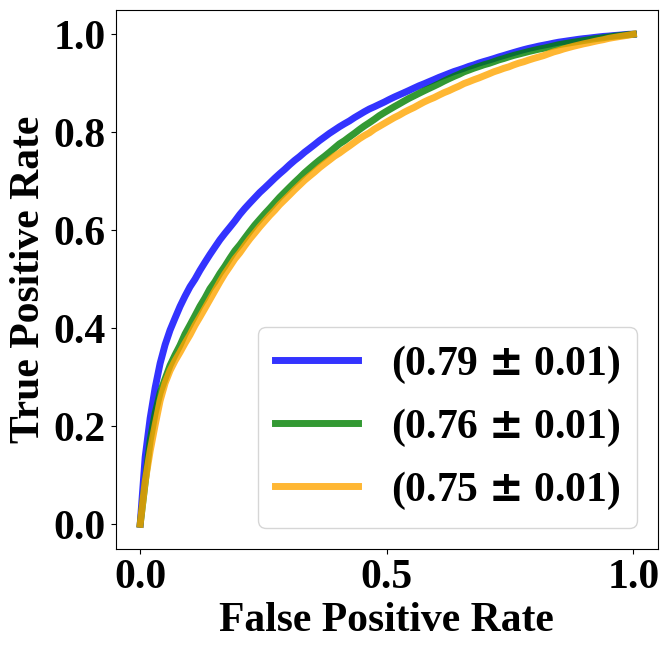

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_xception_pixel_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_resnet50_pixel_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_inception_v3_pixel_aopc.pkl']


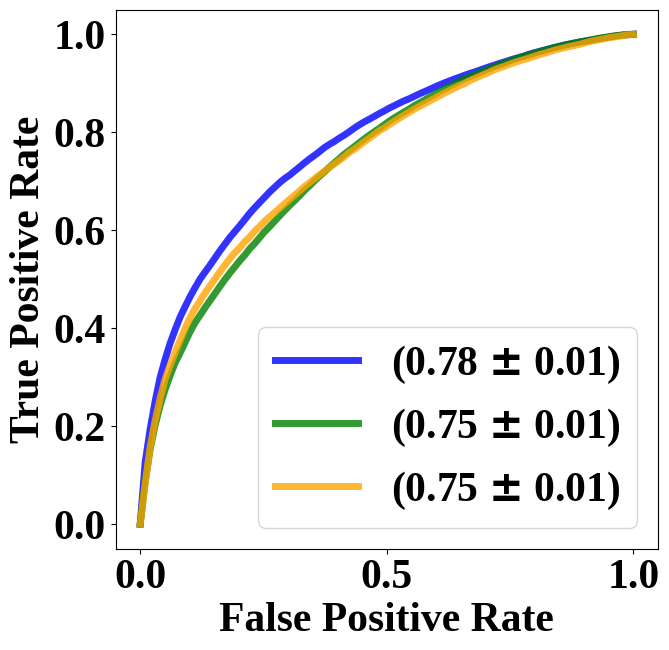

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_xception_pixel_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_resnet50_pixel_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_inception_v3_pixel_aopc.pkl']


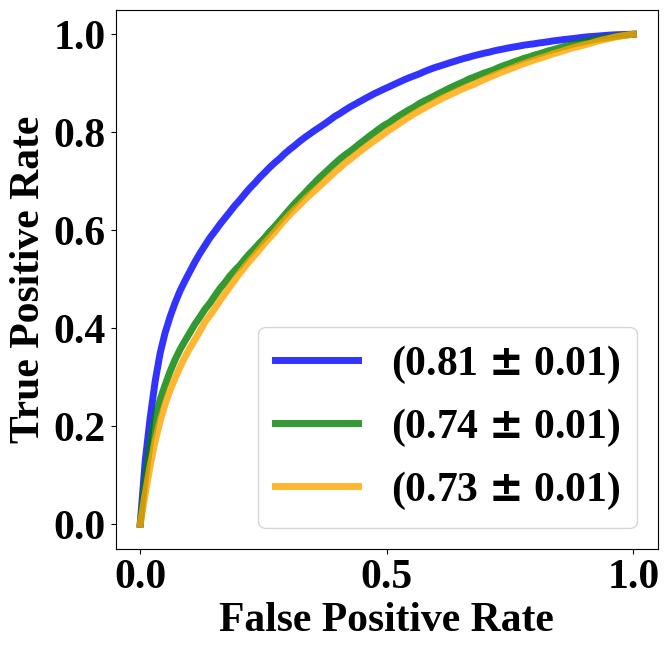

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_xception_pixel_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_resnet50_pixel_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_inception_v3_pixel_faithfulness.pkl']


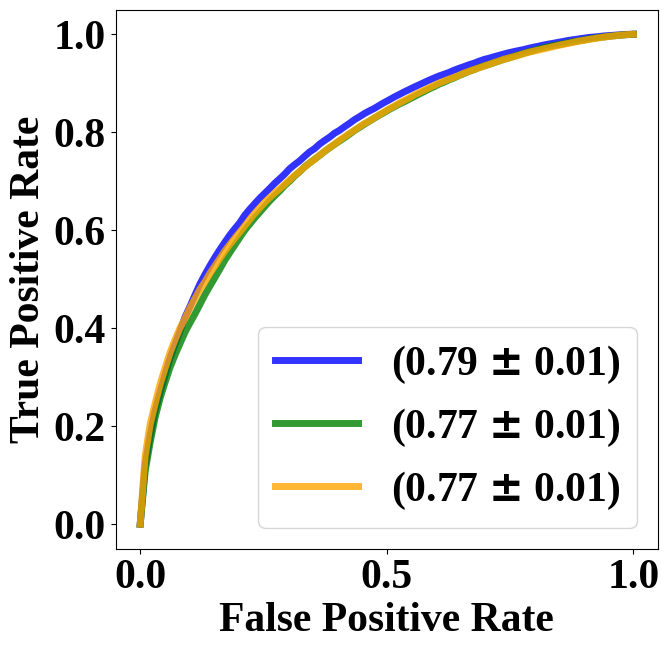

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_xception_pixel_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_resnet50_pixel_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_inception_v3_pixel_faithfulness.pkl']


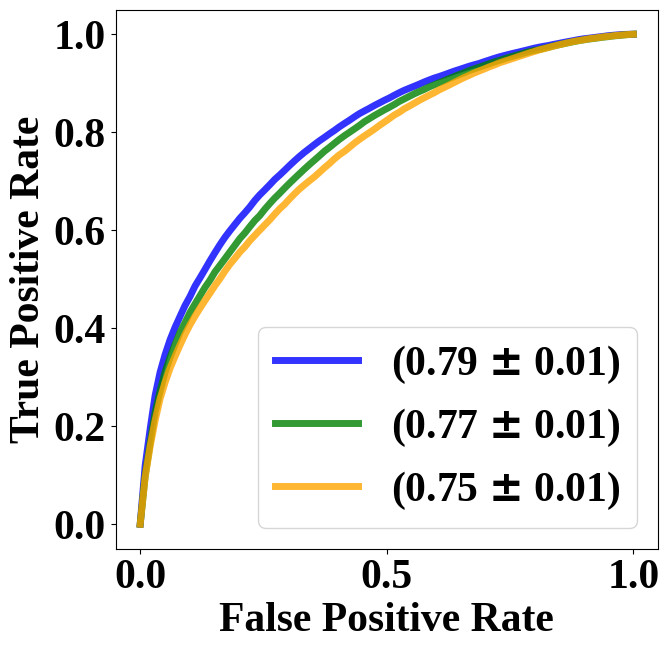

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_xception_pixel_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_resnet50_pixel_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_inception_v3_pixel_faithfulness.pkl']


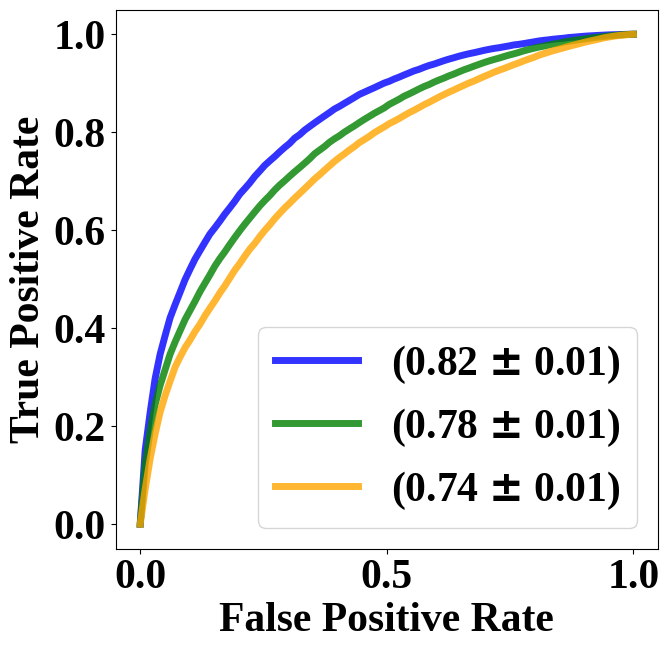

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_xception_patch_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_resnet50_patch_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_inception_v3_patch_aopc.pkl']


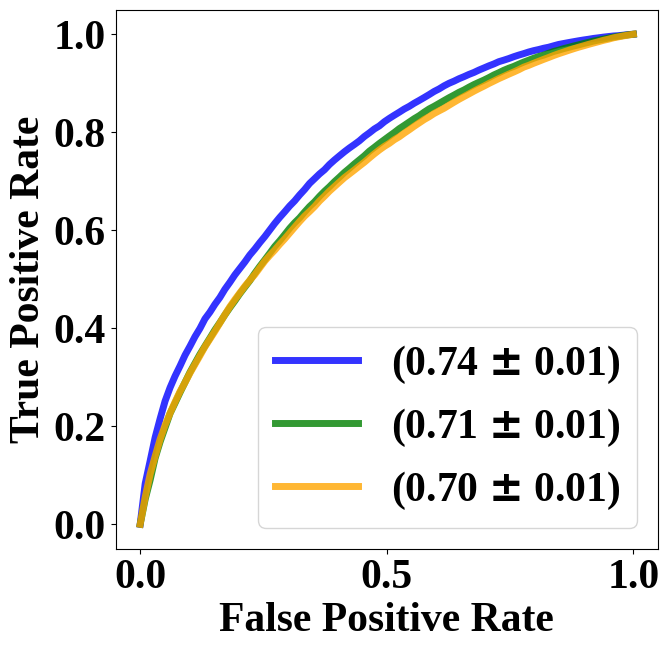

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_xception_patch_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_resnet50_patch_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_inception_v3_patch_aopc.pkl']


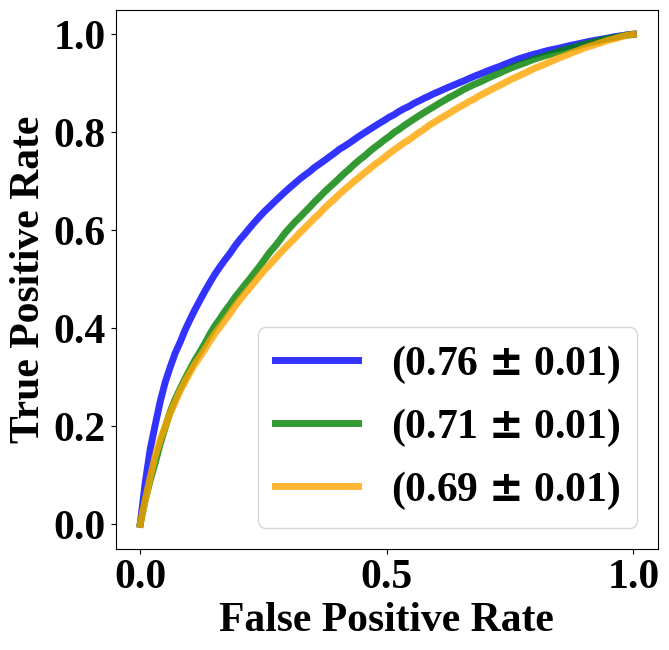

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_xception_patch_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_resnet50_patch_aopc.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_inception_v3_patch_aopc.pkl']


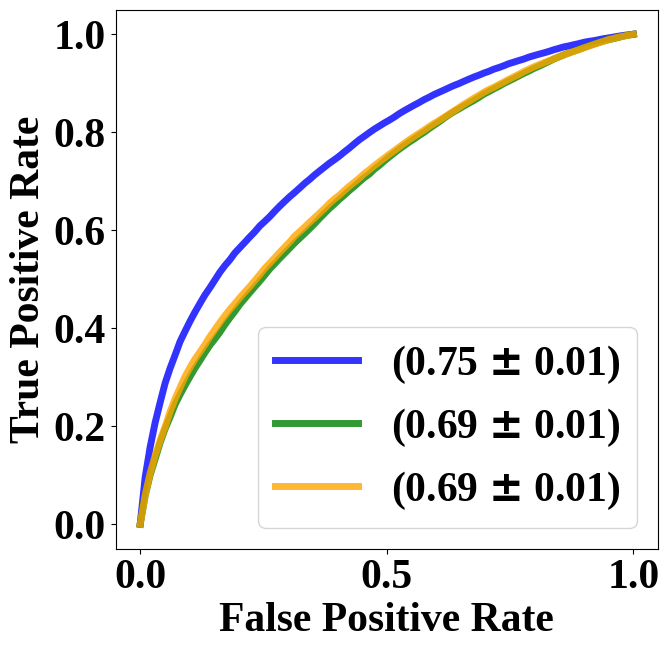

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_xception_patch_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_resnet50_patch_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_pvoc_inception_v3_patch_faithfulness.pkl']


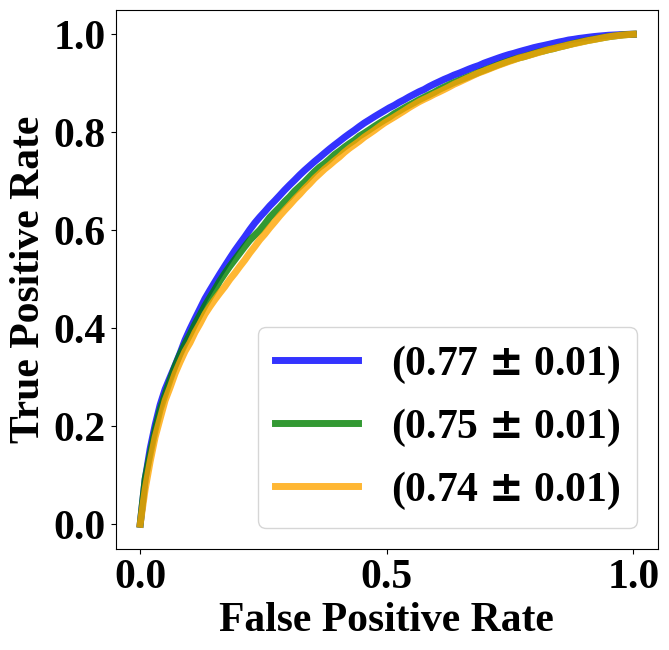

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_xception_patch_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_resnet50_patch_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_oxpets_inception_v3_patch_faithfulness.pkl']


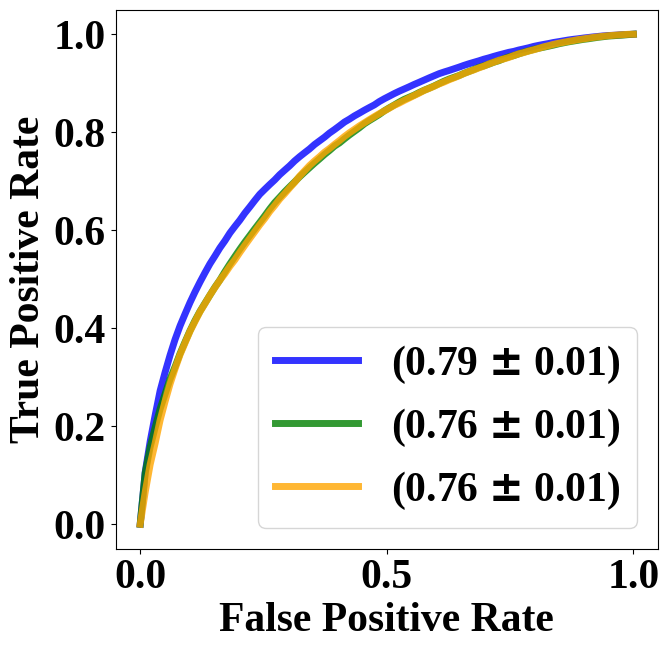

['/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_xception_patch_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_resnet50_patch_faithfulness.pkl', '/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/roc_curve_rf_imagenette_inception_v3_patch_faithfulness.pkl']


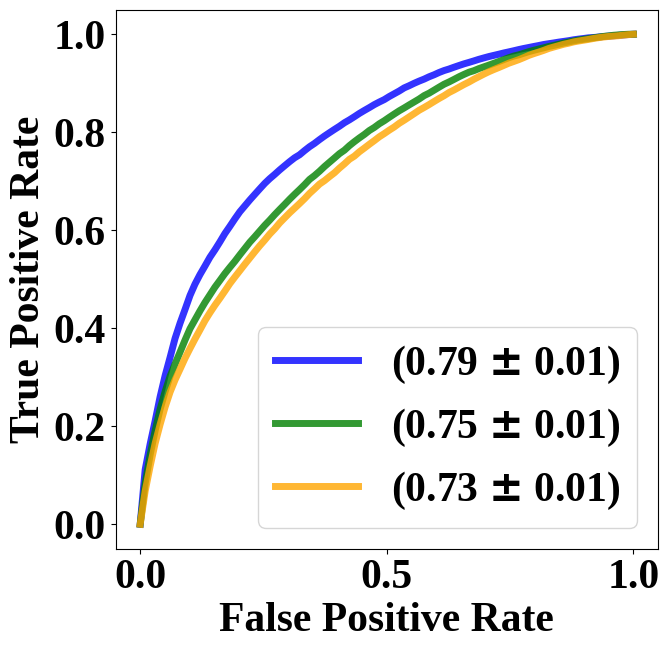

In [ ]:
#plot all ROC curves with each model as different colors
model_names = ["xception", "resnet50", "inception_v3"]
dataset_names = ["pvoc", "oxpets", "imagenette"]
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]
save_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_rf/" #"/content/drive/MyDrive/PhD/Results/sanity/FRIES/3in1_xgb/"

pkl_filenames = os.listdir(save_dir)
pkl_filenames = [filename for filename in os.listdir(save_dir) if filename.endswith('.pkl')]
for pp in pps:
  for metric in metrics:
    for dataset_name in dataset_names:
      pkl_filenames_dataset = [
        os.path.join(save_dir, filename)
        for filename in pkl_filenames
          if pp in filename and metric in filename and dataset_name in filename]
      #print(f"Matching files for pp={pp}, metric={metric}, dataset={dataset_name}:")
      print(pkl_filenames_dataset)
      save_filename = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_final/rf_3in1_" + pp + "_" + metric + "_" + dataset_name + ".png"
      plot_3in1_plots(pkl_filenames_dataset, save_filename)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def make_final_plot_pp(png_files, save_filename, plots_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_final/"):

  dataset_name_dict = {
      "pvoc": "Pascal VOC 2007",
      "oxpets": "Oxford IIIT Pets",
      "imagenette": "Imagenette"
  }

  # List of PNG files
  #png_files = [
  #    'xgb_3in1_pixel_aopc_pvoc.png',
  #    'xgb_3in1_pixel_aopc_oxpets.png',
  #    'xgb_3in1_pixel_aopc_imagenette.png',
  #    'xgb_3in1_pixel_faithfulness_pvoc.png',
  #    'xgb_3in1_pixel_faithfulness_oxpets.png',
  #    'xgb_3in1_pixel_faithfulness_imagenette.png'
  #]

  # Directory path for the plots
  #plots_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_final/"
  png_files = [os.path.join(plots_dir, filename) for filename in png_files]

  # Define colors and labels for the legend
  colors = ['blue', 'green', 'orange']
  labels = ['Xception', 'Resnet50', 'Inception_V3']

  # Create a 3x2 grid of subplots
  fig = plt.figure(figsize=(21, 15))
  axs = [fig.add_subplot(2,3, i+1) for i in range(6)]

  # Flatten the axes array for easy iteration
  #axs = axs.flatten()

  # Loop through each subplot and display the image
  for i, png_file in enumerate(png_files):
      img = mpimg.imread(png_file)
      axs[i].imshow(img)
      axs[i].axis('off')  # Hide the axes for a cleaner look
      metric = (png_file.split('_')[-2]).upper()
      dataset_name = png_file.split('_')[-1].replace('.png', '')
      axs[i].set_title(metric + ' - ' + dataset_name_dict[dataset_name], fontsize=25, fontweight='bold')
      axs[i].set_aspect('equal')

  # Add a single legend for all subplots
  for color, label in zip(colors, labels):
      plt.plot([], [], color=color, label=label, linewidth=10)

  # Positioning the legend at the lower center relative to the whole figure
  fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels), fontsize=30, frameon=False)

  # Adjust the layout and increase the space between subplots
  plt.subplots_adjust(wspace=0, hspace=0)  # Adjust the spacing as needed

  # Adjust layout to avoid overlap
  plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the bottom spacing to make room for the legend

  # Save the plot
  plt.savefig(save_filename, dpi=300, bbox_inches='tight')
  plt.show()

['rf_3in1_pixel_aopc_pvoc.png', 'rf_3in1_pixel_aopc_oxpets.png', 'rf_3in1_pixel_aopc_imagenette.png', 'rf_3in1_pixel_faithfulness_pvoc.png', 'rf_3in1_pixel_faithfulness_oxpets.png', 'rf_3in1_pixel_faithfulness_imagenette.png', 'rf_3in1_patch_aopc_pvoc.png', 'rf_3in1_patch_aopc_oxpets.png', 'rf_3in1_patch_aopc_imagenette.png', 'rf_3in1_patch_faithfulness_pvoc.png', 'rf_3in1_patch_faithfulness_oxpets.png', 'rf_3in1_patch_faithfulness_imagenette.png']
['rf_3in1_pixel_aopc_pvoc.png', 'rf_3in1_pixel_aopc_oxpets.png', 'rf_3in1_pixel_aopc_imagenette.png', 'rf_3in1_pixel_faithfulness_pvoc.png', 'rf_3in1_pixel_faithfulness_oxpets.png', 'rf_3in1_pixel_faithfulness_imagenette.png']
###############


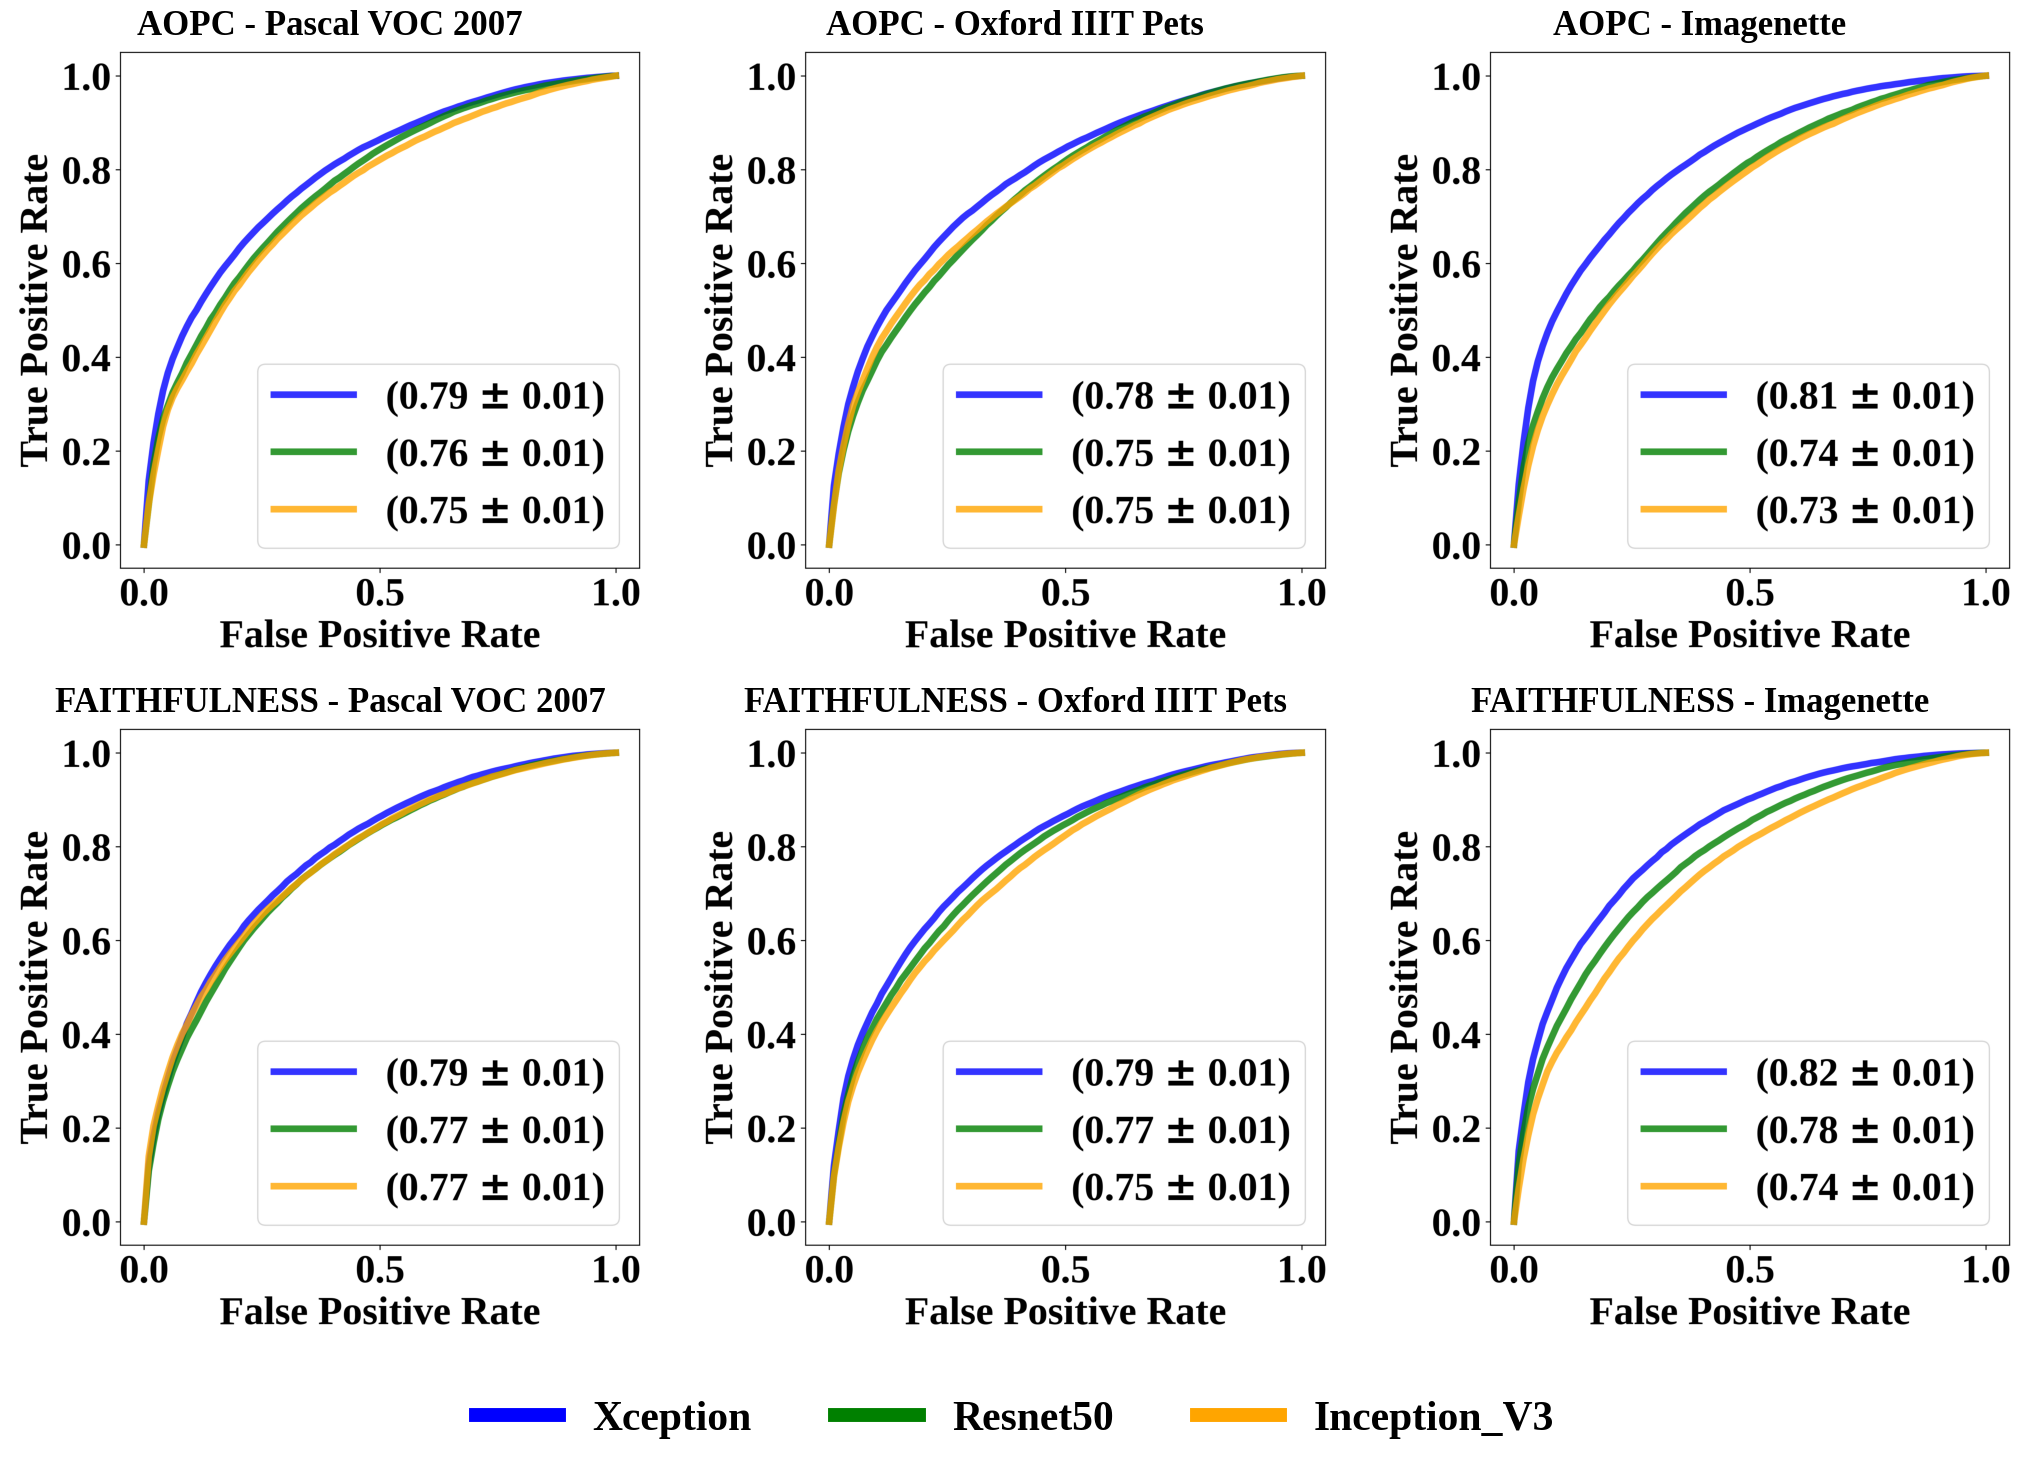

['rf_3in1_patch_aopc_pvoc.png', 'rf_3in1_patch_aopc_oxpets.png', 'rf_3in1_patch_aopc_imagenette.png', 'rf_3in1_patch_faithfulness_pvoc.png', 'rf_3in1_patch_faithfulness_oxpets.png', 'rf_3in1_patch_faithfulness_imagenette.png']
###############


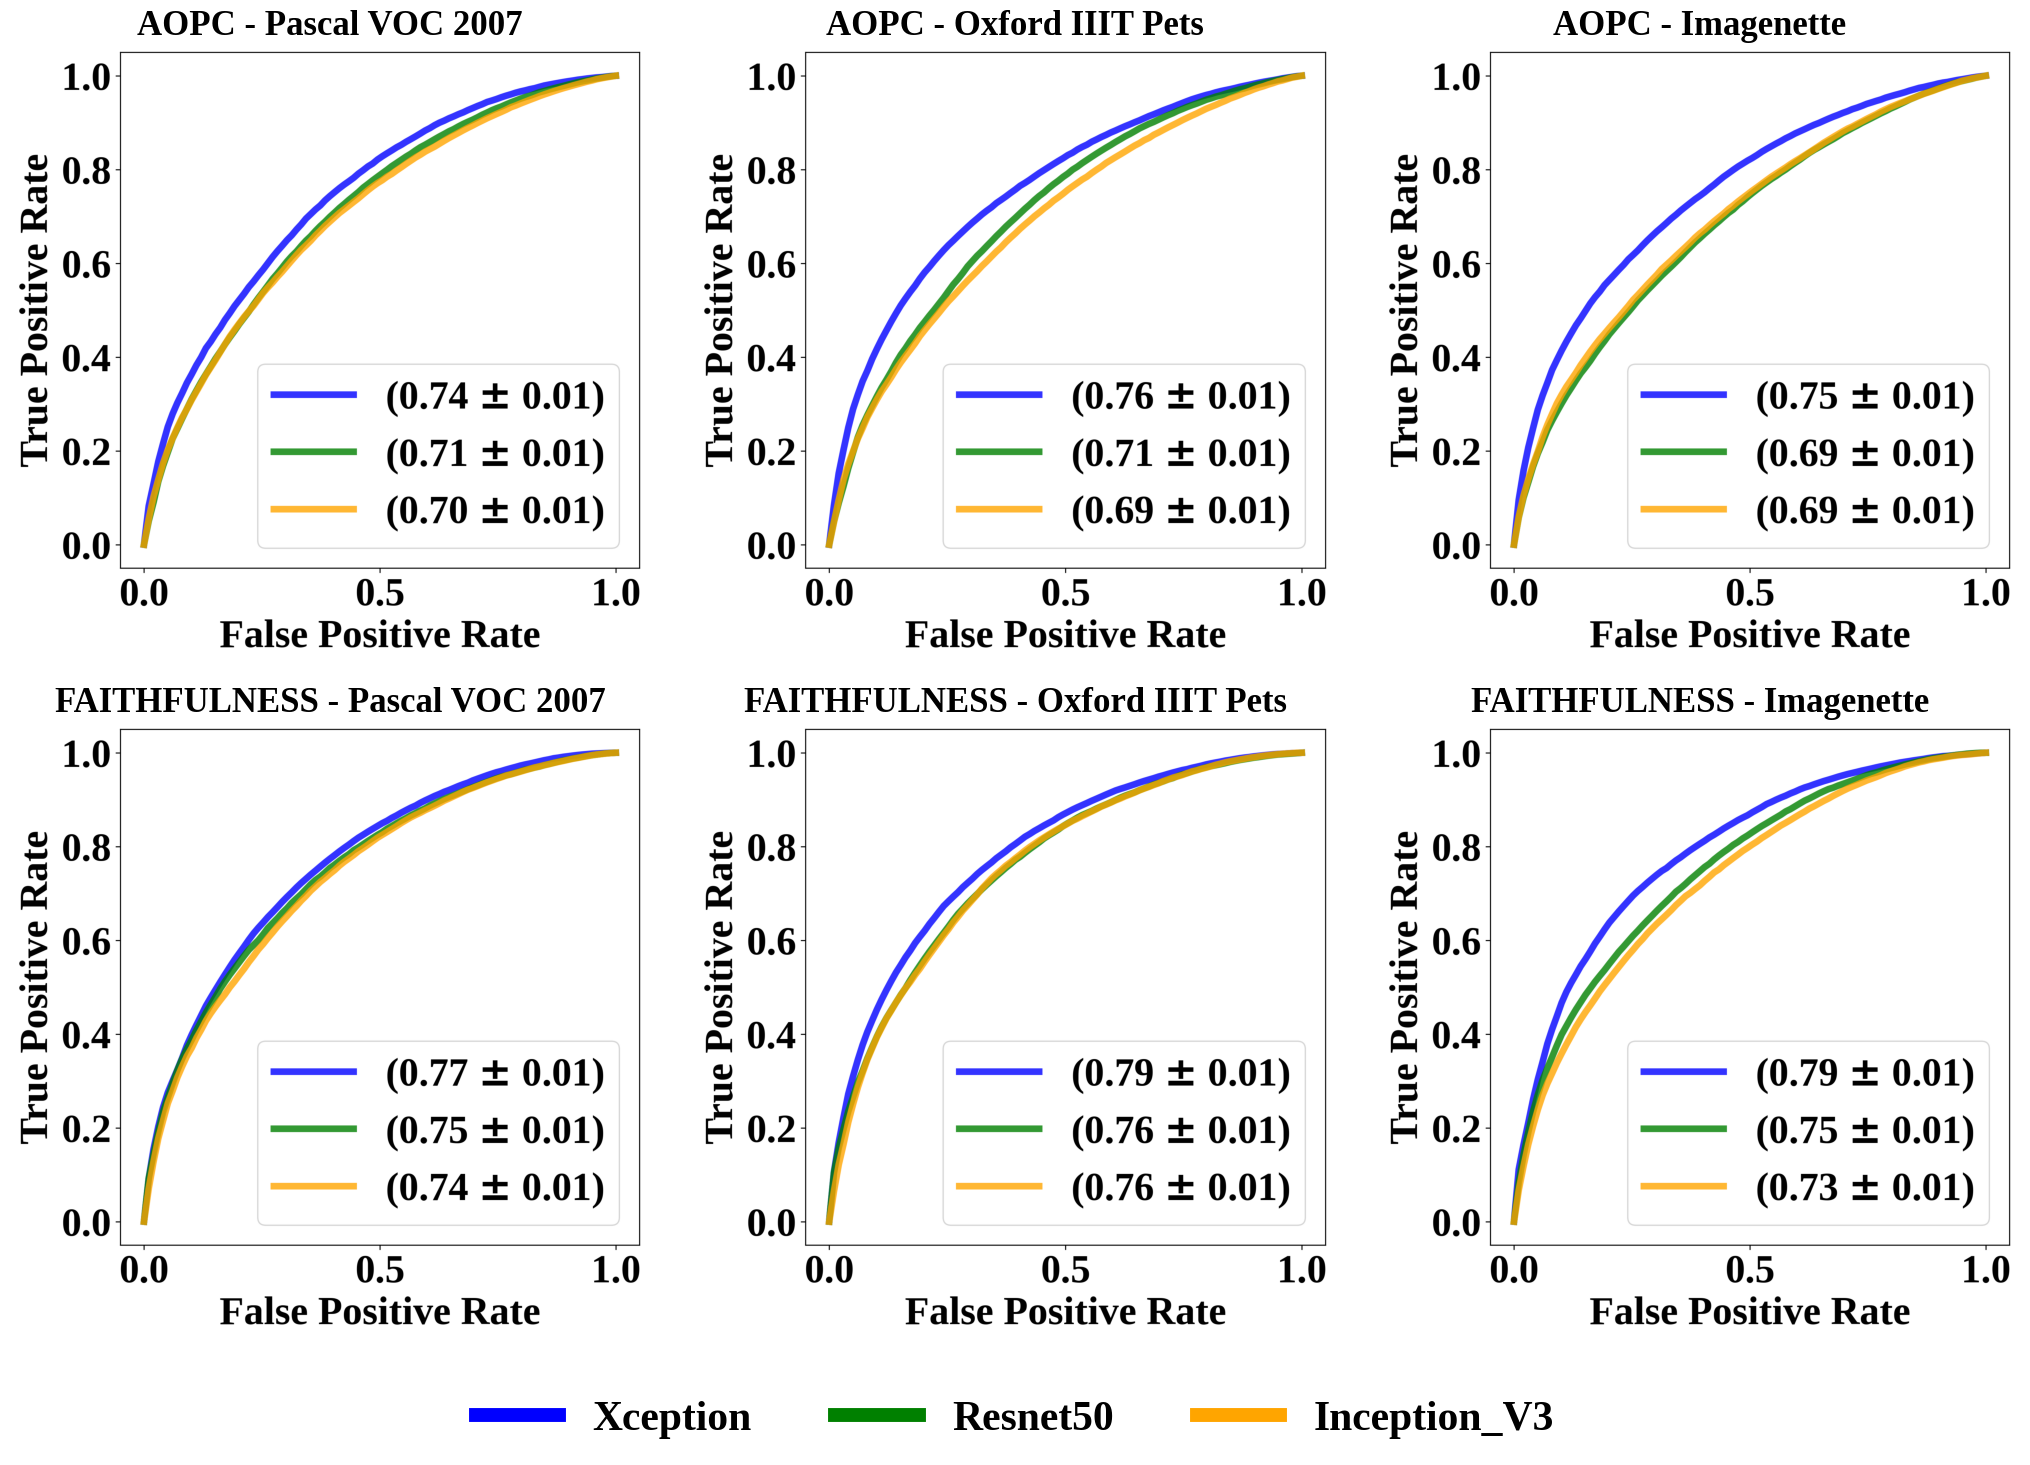

In [ ]:
plots_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots_final/"
dataset_order = {"pvoc": 0, "oxpets": 1, "imagenette": 2}
files = os.listdir(plots_dir)
pattern = 'rf_3in1_' #'xgb_3in1'
files = [filename for filename in files if pattern in filename]
pps = ["pixel", "patch"]
print(files)
for pp in pps:
  png_files = [filename for filename in files if pp in filename]
  png_files = sorted(png_files, key=lambda x: (x.split('_')[3], dataset_order[x.split('_')[4].split('.')[0]]))
  print(png_files)
  print("###############")
  save_filename = plots_dir + "rf_all_final_" + pp + ".pdf"
  make_final_plot_pp(png_files, save_filename)

In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt

base_path = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/plots/"

pkl_filename = base_path + "roc_curve_imagenette_resnet50_patch_faithfulness.pkl"
with open(pkl_filename, 'rb') as file:
    data = pickle.load(file)

data.keys()

dict_keys(['roc_aucs', 'model', 'cv', 'grid_search'])

In [ ]:

model = data['grid_search'].best_estimator_
# Retrieve the feature importance
feature_importance = model.get_booster().get_score(importance_type='weight')

# Print feature importance
print(feature_importance)

# If you want to plot the feature importance
xgb.plot_importance(model, importance_type='weight')
plt.show()

In [ ]:
feature_importance_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/feature_importance/"


pkl_filename = feature_importance_dir + "final_roc_pvoc_xception_pixel_faithfulness.pkl"

with open(pkl_filename, 'rb') as file:
    data = pickle.load(file)

combined_data = pd.concat(data, axis=0)


In [ ]:
import matplotlib as mpl
import os

# Configure font properties
mpl.rcParams['font.family'] = 'Liberation Serif'
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.weight'] = 'normal'#'bold'

feature_importance_dir = "/content/drive/MyDrive/PhD/Results/sanity/FRIES/feature_importance_xgb/"
pps = ["pixel", "patch"]
metrics = ["aopc", "faithfulness"]

feature_name_mapping = {
    'arppd1': 'ARPPD-1',
    'arppd2': 'ARPPD-2',
    'var1': 'VAR-1',
    'var2': 'VAR-2',
    'kurt1': 'KURT-1',
    'kurt2': 'KURT-2',
    'skew1': 'SKEW-1',
    'skew2': 'SKEW-2',
    'Similarity': 'APRC',
    'prob_diffs_cor': 'PDC',
    'mu1': 'MPD-1',
    'mu2': 'MPD-2',
    # Add other feature mappings as needed
}


pkl_filenames = os.listdir(feature_importance_dir)
for pp in pps:
  for metric in metrics:
    relevant_filenames = [filename for filename in pkl_filenames if pp in filename and metric in filename and filename.endswith('.pkl')]
    print(relevant_filenames)

    all_data = []
    all_features = set()

    # First pass: Load all data and collect all unique features
    for pkl_filename in relevant_filenames:
        with open(os.path.join(feature_importance_dir, pkl_filename), 'rb') as file:
            data = pickle.load(file)
            # Assuming `data` is a list of DataFrames
            for df in data:
                all_features.update(df['Feature'].unique())
                all_data.append(df)

    # Second pass: Ensure all DataFrames have all features, filling missing ones with 0
    processed_data = []
    for df in all_data:
        df = df.set_index('Feature')
        df = df.reindex(all_features, fill_value=0).reset_index()
        processed_data.append(df)

    # Combine all the processed DataFrames into one
    combined_data = pd.concat(processed_data, axis=0)

    ##sorting as per median gain
    # Calculate the median gain for each feature
    median_gain = combined_data.groupby('Feature')['Importance'].median()
    # Sort the features by median gain in descending order
    sorted_features = median_gain.sort_values(ascending=False).index
    # Reorder the combined_data DataFrame based on sorted features
    combined_data['Feature'] = pd.Categorical(combined_data['Feature'], categories=sorted_features, ordered=True)
    # Apply the mapping to the Feature column
    combined_data['Feature'] = combined_data['Feature'].replace(feature_name_mapping)

    ##sorting as per median gain

    plt.figure(figsize=(5, 7))
    sns.stripplot(x='Importance', y='Feature', data=combined_data, color='blue', jitter=True, size=1.5)
    plt.title(metric.upper(), fontweight="bold")
    plt.xlabel('Gain (Importance)', fontsize=18, fontweight="bold")
    plt.ylabel('Features', fontsize=18, fontweight="bold")
    plt.yticks(rotation=45, ha='right')
    plt.tight_layout()

    plot_name = "xgb_" + pp + "_" + metric + ".png"
    plt.savefig(plot_name)
    #plt.grid(True)
    plt.show()

['final_roc_pvoc_xception_pixel_aopc.pkl', 'final_roc_pvoc_resnet50_pixel_aopc.pkl', 'final_roc_pvoc_inceptionv3_pixel_aopc.pkl', 'final_roc_oxpets_xception_pixel_aopc.pkl', 'final_roc_oxpets_resnet50_pixel_aopc.pkl', 'final_roc_oxpets_inceptionv3_pixel_aopc.pkl', 'final_roc_imagenette_xception_pixel_aopc.pkl', 'final_roc_imagenette_resnet50_pixel_aopc.pkl', 'final_roc_imagenette_inceptionv3_pixel_aopc.pkl']


NameError: name 'pickle' is not defined

In [ ]:
from PIL import Image

def concatenate_images_side_by_side(image1_path, image2_path, output_path):
    # Open the images
    image1 = Image.open(image1_path)
    image2 = Image.open(image2_path)

    # Get the dimensions of the images
    width1, height1 = image1.size
    width2, height2 = image2.size

    # Create a new image with a width that's the sum of both image widths
    # and the height of the taller image
    new_width = width1 + width2
    new_height = max(height1, height2)
    new_image = Image.new('RGB', (new_width, new_height))

    # Paste image1 and image2 into the new image
    new_image.paste(image1, (0, 0))
    new_image.paste(image2, (width1, 0))

    # Save the concatenated image
    new_image.save(output_path)

In [ ]:
concatenate_images_side_by_side('patch_faithfulness.png', 'patch_aopc.png', 'patch_fe.png')
concatenate_images_side_by_side('pixel_faithfulness.png', 'pixel_aopc.png', 'pixel_fe.png')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 16.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


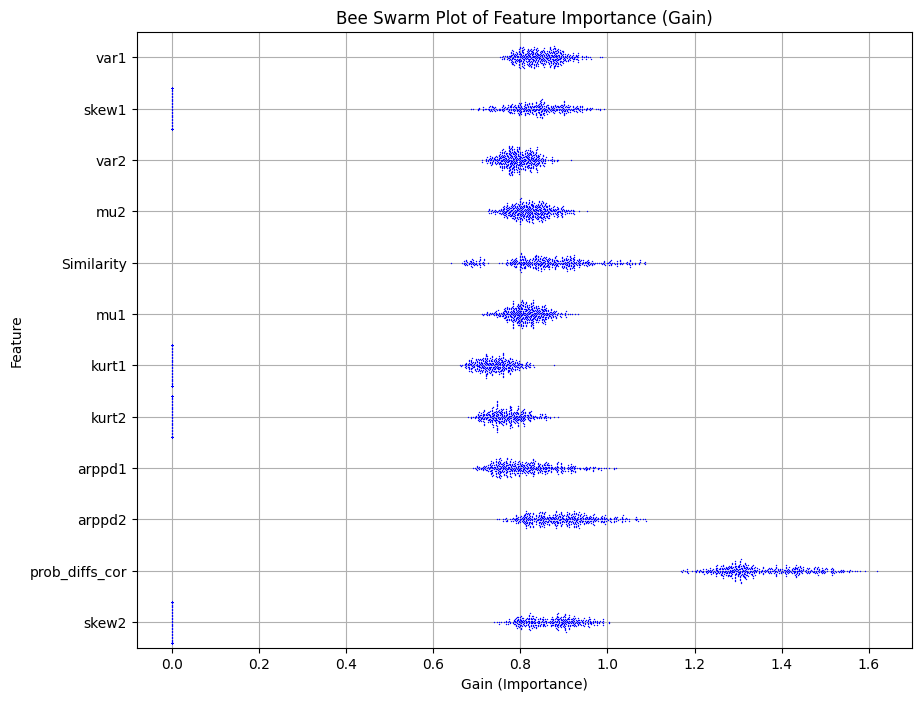

In [ ]:
import matplotlib.pyplot as plt


# Plot the bee swarm plot
plt.figure(figsize=(10, 8))
sns.swarmplot(x='Importance', y='Feature', data=combined_data, color='blue', size = 1)
plt.title('Bee Swarm Plot of Feature Importance (Gain)')
plt.xlabel('Gain (Importance)')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

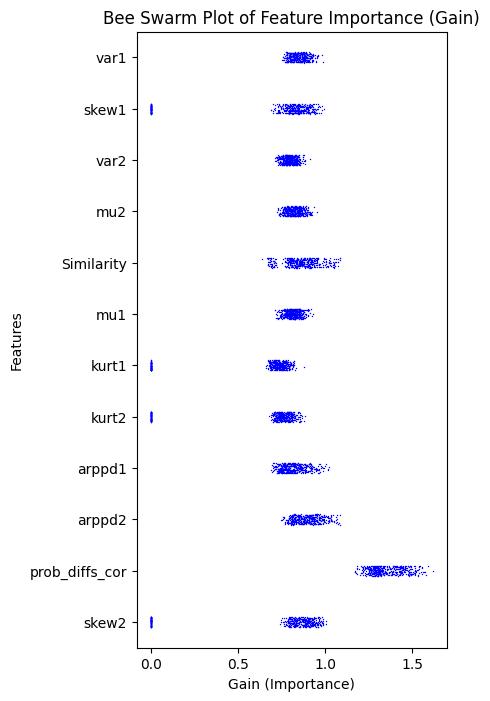

In [ ]:
import matplotlib.pyplot as plt


# Plot the bee swarm plot
plt.figure(figsize=(4, 8))
sns.stripplot(x='Importance', y='Feature', data=combined_data, color='blue', jitter=True, size=1)
plt.title('Bee Swarm Plot of Feature Importance (Gain)')
plt.xlabel('Gain (Importance)')
plt.ylabel('Features')
#plt.grid(True)
plt.show()

In [ ]:
combined_data.columns

Index(['Feature', 'Importance'], dtype='object')

In [ ]:
datasets = ["oxpets", "pvoc", "imagenette"]
model_names = ["inception_v3", "resnet50", "xception"]

# Perform Wilcoxon signed-rank tests across datasets for each model
print("Wilcoxon Signed-Rank Test  for Each Model Across Datasets:")

for model_name in model_names:
    stacked_values = []
    for dataset in datasets:
        key = f"{dataset}_{model_name}"
        if key in dataset_model_roc:
            values = np.vstack(list(dataset_model_roc[key].values()))
            stacked_values.append(values)

    #if len(stacked_values) == len(datasets):
    stacked_values = np.vstack(stacked_values)
        # Assuming the arrays are of the same shape, stack and perform Wilcoxon signed-rank test
    stat, p_value = wilcoxon(stacked_values[:,0], stacked_values[:,1])
    print(
            f"Model: {model_name}, Wilcoxon statistic: {stat}, p-value: {p_value}")


# Perform Wilcoxon signed-rank tests across models for each dataset
print("\n\nWilcoxon Signed-Rank Test for Each Dataset Across Models:")

for dataset in datasets:
    stacked_values = []
    for model_name in model_names:
        key = f"{dataset}_{model_name}"
        if key in dataset_model_roc:
            values = np.vstack(list(dataset_model_roc[key].values()))
            stacked_values.append(values)

    #if len(stacked_values) == len(model_names):
    stacked_values = np.vstack(stacked_values)
    # Perform Wilcoxon signed-rank test
    stat, p_value = wilcoxon(stacked_values[:, 0], stacked_values[:, 1])
    print(f"Dataset: {dataset}, Wilcoxon statistic: {stat}, p-value: {p_value}")

Wilcoxon Signed-Rank Test  for Each Model Across Datasets:
Model: inception_v3, Wilcoxon statistic: 40.0, p-value: 0.463134765625
Model: resnet50, Wilcoxon statistic: 92.0, p-value: 0.4319114685058594
Model: xception, Wilcoxon statistic: 29.0, p-value: 0.153076171875


Wilcoxon Signed-Rank Test for Each Dataset Across Models:
Dataset: oxpets, Wilcoxon statistic: 74.0, p-value: 0.1571340560913086
Dataset: pvoc, Wilcoxon statistic: 40.0, p-value: 0.463134765625
Dataset: imagenette, Wilcoxon statistic: 40.0, p-value: 0.463134765625


In [ ]:
import scipy.stats as stats
import numpy as np

# Dictionary containing the data
dataset_model = {
    # Populate with your dataset_model dictionary data
}

datasets = ["oxpets", "pvoc", "imagenette"]
model_names = ["inception_v3", "resnet50", "xception"]

results = []

for dataset in datasets:
    for model_name in model_names:
        key = dataset + "_" + model_name
        if key in dataset_model_roc.keys():
            data = dataset_model_roc[key]
            auc_roc_1 = [values[0] for perturbation, values in data.items()]
            auc_roc_2 = [values[1] for perturbation, values in data.items()]

            differences = np.array(auc_roc_1) - np.array(auc_roc_2)

            stat, p_value = stats.wilcoxon(auc_roc_1, auc_roc_2) # default two sides alternative

            median_difference = np.median(differences)
            positive_differences = np.sum(differences > 0)
            negative_differences = np.sum(differences < 0)

            results.append((key, stat, p_value, median_difference, positive_differences, negative_differences))
        else:
            results.append((key, "Data not available", "No P-value", "No Median", "No Positives", "No Negatives"))

for result in results:
    print(f"Dataset and Model: {result[0]}, Wilcoxon Test Statistic (W): {result[1]}, P-value: {result[2]}, Median Difference: {result[3]}, Positives: {result[4]}, Negatives: {result[5]}")

Dataset and Model: oxpets_inception_v3, Wilcoxon Test Statistic (W): 10.0, P-value: 0.1640625, Median Difference: 0.17451859107430945, Positives: 5, Negatives: 4
Dataset and Model: oxpets_resnet50, Wilcoxon Test Statistic (W): 12.0, P-value: 0.25, Median Difference: 0.18940518420429564, Positives: 5, Negatives: 4
Dataset and Model: oxpets_xception, Wilcoxon Test Statistic (W): 10.0, P-value: 0.1640625, Median Difference: 0.2063466065391747, Positives: 5, Negatives: 4
Dataset and Model: pvoc_inception_v3, Wilcoxon Test Statistic (W): 10.0, P-value: 0.1640625, Median Difference: 0.1887594842175997, Positives: 5, Negatives: 4
Dataset and Model: pvoc_resnet50, Wilcoxon Test Statistic (W): 10.0, P-value: 0.1640625, Median Difference: 0.18107936560133464, Positives: 5, Negatives: 4
Dataset and Model: pvoc_xception, Wilcoxon Test Statistic (W): 10.0, P-value: 0.1640625, Median Difference: 0.2078342998399476, Positives: 5, Negatives: 4
Dataset and Model: imagenette_inception_v3, Wilcoxon Test 

Dataset: oxpets, Wilcoxon Test Statistic (W): 78.0, P-value: 0.20291709899902344, Median Difference: -0.01101576388835479, Positives: 9, Negatives: 12
Dataset: pvoc, Wilcoxon Test Statistic (W): 78.0, P-value: 0.20291709899902344, Median Difference: -0.047303525863145346, Positives: 9, Negatives: 12
Dataset: imagenette, Wilcoxon Test Statistic (W): 78.0, P-value: 0.20291709899902344, Median Difference: -0.029521002971855337, Positives: 9, Negatives: 12


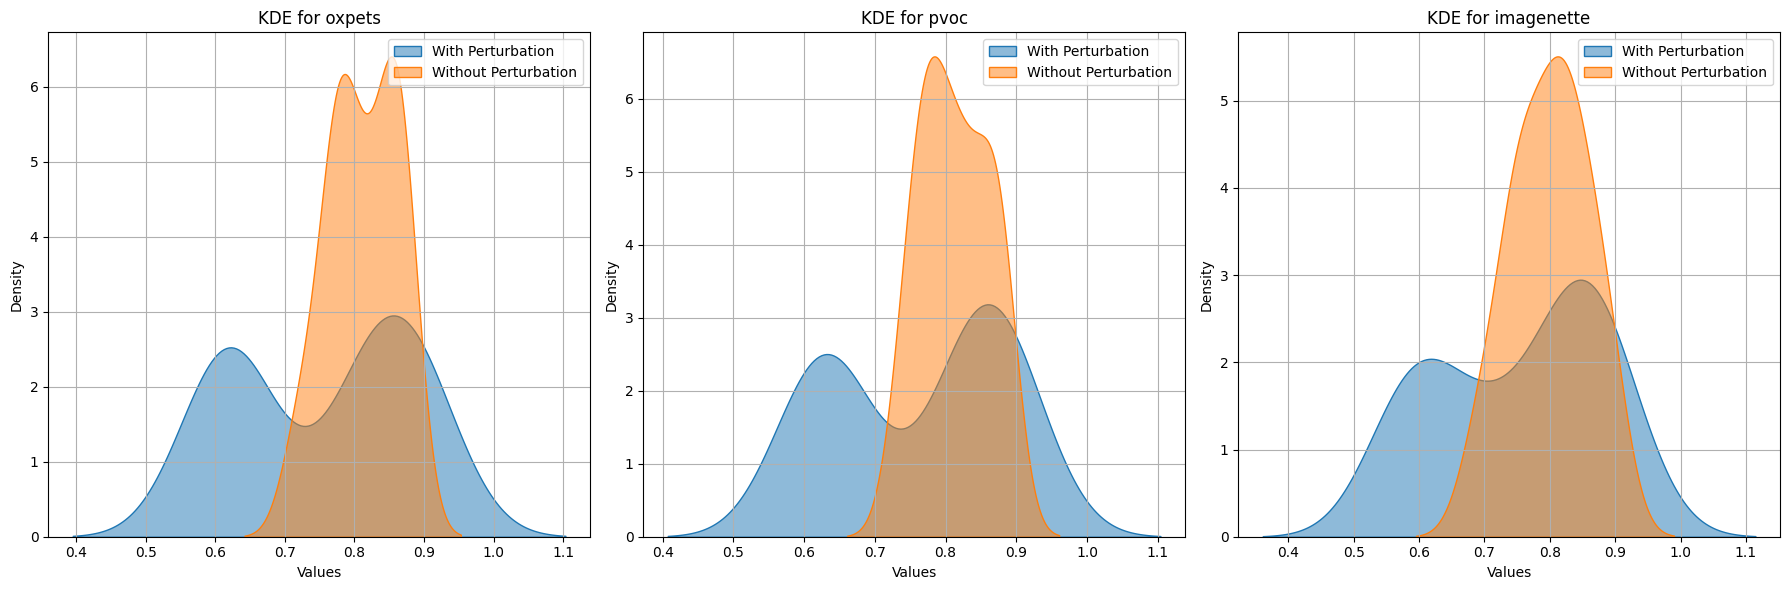

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming dataset_model_roc is already populated
datasets = ["oxpets", "pvoc", "imagenette"]
model_names = ["inception_v3", "resnet50", "xception"]

results = []
aggregated_data = {dataset: {"with_perturbation": [], "without_perturbation": []} for dataset in datasets}

for dataset in datasets:
    for model_name in model_names:
        key = dataset + "_" + model_name
        if key in dataset_model_roc.keys():
            data = dataset_model_roc[key]
            auc_roc_1 = [values[0] for perturbation, values in data.items()]
            auc_roc_2 = [values[1] for perturbation, values in data.items()]

            # Aggregate data for KDE plotting
            aggregated_data[dataset]["without_perturbation"].extend(auc_roc_1)
            aggregated_data[dataset]["with_perturbation"].extend(auc_roc_2)
        else:
            print(f"Data not available for key: {key}")

# Compute Wilcoxon signed-rank test for each dataset
for dataset in datasets:
    auc_roc_1 = aggregated_data[dataset]["without_perturbation"]
    auc_roc_2 = aggregated_data[dataset]["with_perturbation"]

    differences = np.array(auc_roc_1) - np.array(auc_roc_2)

    if len(auc_roc_1) > 0 and len(auc_roc_2) > 0:
        stat, p_value = stats.wilcoxon(auc_roc_1, auc_roc_2)  # default two sides alternative
        median_difference = np.median(differences)
        positive_differences = np.sum(differences > 0)
        negative_differences = np.sum(differences < 0)
        results.append((dataset, stat, p_value, median_difference, positive_differences, negative_differences))
    else:
        results.append((dataset, "Data not available", "No P-value", "No Median", "No Positives", "No Negatives"))

# Print results
for result in results:
    print(f"Dataset: {result[0]}, Wilcoxon Test Statistic (W): {result[1]}, P-value: {result[2]}, Median Difference: {result[3]}, Positives: {result[4]}, Negatives: {result[5]}")

# Plot KDEs for each dataset
plt.figure(figsize=(18, 6))

for i, dataset in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    sns.kdeplot(aggregated_data[dataset]["with_perturbation"], label='With Perturbation', fill=True, common_norm=False, alpha=0.5)
    sns.kdeplot(aggregated_data[dataset]["without_perturbation"], label='Without Perturbation', fill=True, common_norm=False, alpha=0.5)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title(f'KDE for {dataset}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

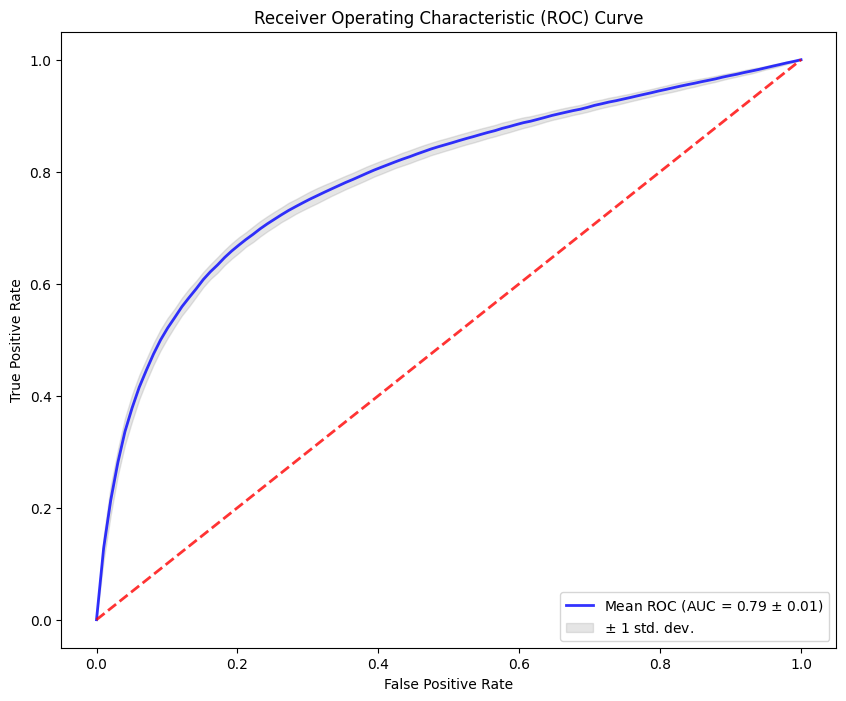

In [ ]:
#roc plot with confidence interval

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import RepeatedStratifiedKFold

# Assuming grid_search is already defined and fit as per your earlier code

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Arrays to store the true positive rates, false positive rates, and ROC AUC scores
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Define the cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
X = np.array(X)
y = np.array(y)
# Perform cross-validation again to collect ROC curve data
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    smote = BorderlineSMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    best_model.fit(X_train_resampled, y_train_resampled)
    y_prob = best_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Calculate the mean and standard deviation of the true positive rates
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)

# Plot the standard deviation of the ROC curves
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# Store the original y values before transformation
y_original = df['cam_rank_target'].values

# Transform y for classification
y = (y > 0.5).astype(int)

# Initialize arrays to store predictions, true values, and indices
y_true = []
y_pred = []
y_pred_prob = []
misclassified_indices_all = []
misclassified_original_values = []
misclassified_prediction_probs = []

# Perform cross-validation manually
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Apply SMOTE to the training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Fit the best model on the resampled training data
    best_model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities on the test data
    y_test_pred_prob = best_model.predict_proba(X_test)[:, 1]

    # Predict on the test data
    y_test_pred = (y_test_pred_prob > 0.5).astype(int)

    # Store the true values, the predictions, the predicted probabilities, and indices of the test samples
    y_true.extend(y_test)
    y_pred.extend(y_test_pred)
    y_pred_prob.extend(y_test_pred_prob)

    # Identify misclassified samples for this split
    misclassified_indices_split = test_index[y_test != y_test_pred]
    misclassified_indices_all.extend(misclassified_indices_split)

    # Store the original y values and prediction probabilities for misclassified samples
    misclassified_original_values.extend(y_original[misclassified_indices_split])
    misclassified_prediction_probs.extend(y_test_pred_prob[y_test != y_test_pred])

# Convert to numpy arrays for further analysis
y_true = np.array(y_true)
y_pred = np.array(y_pred)
y_pred_prob = np.array(y_pred_prob)
misclassified_indices = np.array(misclassified_indices_all)
misclassified_original_values = np.array(misclassified_original_values)
misclassified_prediction_probs = np.array(misclassified_prediction_probs)

# Print the original y values that were wrongly predicted along with their predicted probabilities
print("Original y values that were wrongly predicted and their prediction probabilities:")
for original_value, prediction_prob in zip(misclassified_original_values, misclassified_prediction_probs):
    print(f"Original Value: {original_value}, Prediction Probability: {prediction_prob}")

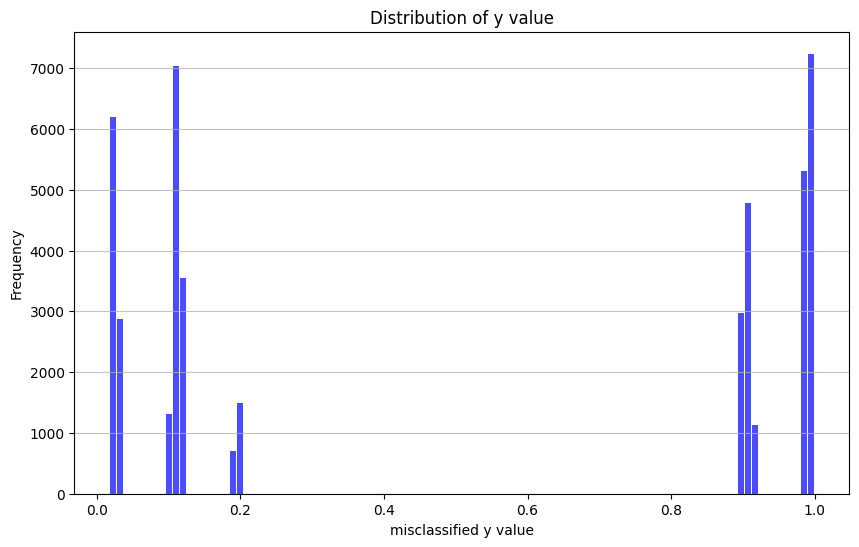

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of 'cam_rank_target'
plt.figure(figsize=(10, 6))
plt.hist(misclassified_original_values, bins=100, color='blue', alpha=0.7, rwidth=0.85)
plt.xlabel('misclassified y value')
plt.ylabel('Frequency')
plt.title('Distribution of y value')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
###ROC old
smote = BorderlineSMOTE() #SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Define your model and perform grid search (using X_train, y_train)
clf = xgb.XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
param_grid = {
        'n_estimators': [200, 500],  # number of trees
        'max_depth': [6, 9],  #
        #'learning_rate': [0.01, 0.1, 0.3],  #
        #'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75],
        #'colsample_bylevel': [0.5, 0.75, 1.0],
        #'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0.01, 0.1, 0.5],
        'reg_lambda': [0.1, 0.5, 0.75],
        #'scale_pos_weight': [3, 5, 7]
    }
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, import...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [6, 9],
                         'n_estimators': [200, 500],
                         'reg_alpha': [0.01, 0.1, 0.5],
                         'reg_lambda': [0.1, 0.5, 0.75]},
             scoring='roc_auc')

In [ ]:
grid_search.best_score_

0.8913382784498449

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the best estimator from GridSearchCV
best_model = grid_search.best_estimator_

# Arrays to store the true positive rates, false positive rates, and ROC AUC scores
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Extract cross-validation results
cv_results = grid_search.cv_results_
split_keys = [key for key in cv_results if key.startswith('split') and key.endswith('_test_score')]

# Iterate over each split's results
for split_key in split_keys:
    split_index = int(split_key.split('_')[1][5:])  # Extract the split index
    y_prob = cv_results[f'split{split_index}_test_proba']  # Predicted probabilities
    y_true = cv_results[f'split{split_index}_test_true']  # True labels

    # Calculate ROC curve and AUC for this split
    fpr, tpr, _ = roc_curve(y_true, y_prob[:, 1])
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Calculate the mean and standard deviation of the true positive rates
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)

# Plot the standard deviation of the ROC curves
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ValueError: invalid literal for int() with base 10: ''

In [ ]:
#ROC Plot
# Get the best estimator
best_model = grid_search.best_estimator_

# Arrays to store the true positive rates, false positive rates, and ROC AUC scores
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform cross-validation again to collect ROC curve data
for train, test in cv.split(X_resampled, y_resampled):
    best_model.fit(X_resampled[train], y_resampled[train])
    y_prob = best_model.predict_proba(X_resampled[test])[:, 1]
    fpr, tpr, _ = roc_curve(y_resampled[test], y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Calculate the mean and standard deviation of the true positive rates
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)

# Plot the standard deviation of the ROC curves
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

KeyError: "None of [Index([    0,     1,     2,     3,     4,     5,     6,     7,     9,    10,\n       ...\n       23102, 23103, 23104, 23105, 23107, 23108, 23109, 23110, 23111, 23113],\n      dtype='int64', length=18491)] are in the [columns]"

In [ ]:
grid_search.cv_results_

AttributeError: 'ellipsis' object has no attribute 'cv_results_'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming grid_search is your GridSearchCV object
#grid_search = ...  # Replace with your GridSearchCV object

# Extract the test ROC AUC scores for each split
mean_test_scores = grid_search.cv_results_['mean_test_score']

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(mean_test_scores, bins=10, edgecolor='black')
plt.title('Distribution of Test ROC AUC Scores for 50 Splits (5x10 Repeated CV)')
plt.xlabel('ROC AUC Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

AttributeError: 'ellipsis' object has no attribute 'cv_results_'

In [ ]:
#####                                 Old code below

In [ ]:
smote = BorderlineSMOTE() #SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)
param_grid = {
        'n_estimators': [200, 500],  # number of trees
        'max_depth': [6, 9],  #
        #'learning_rate': [0.01, 0.1, 0.3],  #
        #'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75],
        #'colsample_bylevel': [0.5, 0.75, 1.0],
        #'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0.01, 0.1, 0.5],
        'reg_lambda': [0.1, 0.5, 0.75],
        #'scale_pos_weight': [3, 5, 7]
    }

# Scoring metrics (F1 scores for class 0 and class 1)
scoring = {
    'F1_score_class_0': make_scorer(f1_score, pos_label=0),
    'F1_score_class_1': make_scorer(f1_score, pos_label=1)
}

clf = xgb.XGBClassifier()

# Initialize repeated stratified k-fold cross-validation
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring=scoring, refit='F1_score_class_1')
grid_search.fit(X_sm, y_sm)

# Results
print("Best hyperparameters AOPC(APRC, ARPPD):", grid_search.best_params_)
print("Mean F1 score for class 0:", grid_search.cv_results_['mean_test_F1_score_class_0'][grid_search.best_index_])
print("Mean F1 score for class 1:", grid_search.best_score_)

Best hyperparameters AOPC(APRC, ARPPD): {'colsample_bytree': 0.75, 'max_depth': 9, 'n_estimators': 500, 'reg_alpha': 0.5, 'reg_lambda': 0.75}
Mean F1 score for class 0: 0.809835677041826
Mean F1 score for class 1: 0.8046828516798893


In [ ]:
final_model = grid_search.best_estimator_
print(final_model)

y_scores_val = grid_search.best_estimator_.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_scores_val)
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]

# Evaluate the final model and threshold on the test set (using X_test, y_test)
y_scores_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_test = (y_scores_test >= optimal_threshold).astype(int)

print("Optimal threshold according to Youden's J:", optimal_threshold)
# Output your evaluation metrics for the test set

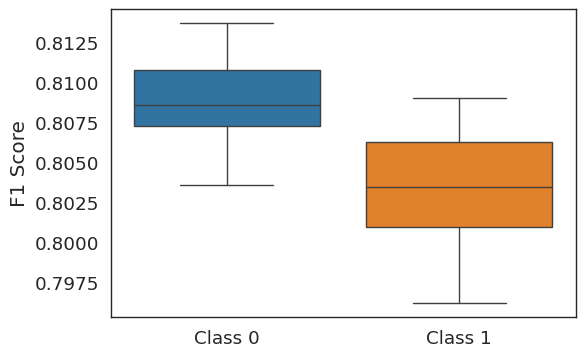

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to 'white' to remove background and grid lines
sns.set_style("white")

# Set the font size and context
sns.set_context("paper", font_scale=1.5)  # Adjust the font scale as needed

# Get F1 scores for each repetition for class 0
f1_scores_class_0 = []
for i in range(10):  # Assuming you have 10 repetitions
    mean_f1_score_class_0 = grid_search.cv_results_[f'split{i}_test_F1_score_class_0'][grid_search.best_index_]
    f1_scores_class_0.append(mean_f1_score_class_0)

# Get F1 scores for each repetition for class 1
f1_scores_class_1 = []
for i in range(10):  # Assuming you have 10 repetitions
    mean_f1_score_class_1 = grid_search.cv_results_[f'split{i}_test_F1_score_class_1'][grid_search.best_index_]
    f1_scores_class_1.append(mean_f1_score_class_1)

# Create box plots for F1 scores of class 0 and class 1
plt.figure(figsize=(6, 4))
sns.boxplot(data=[f1_scores_class_0, f1_scores_class_1])
#plt.title('Box Plot of F1 Scores for Class 0 and Class 1')
plt.ylabel('F1 Score')
plt.xticks([0, 1], ['Class 0', 'Class 1'])
#plt.ylim(0.6, 0.785)  # Set y-axis limits
plt.savefig('oxpets_xception_aopc.pdf', format='pdf', bbox_inches='tight')
plt.show()

with open('oxpets_xception_aopc.pkl', 'wb') as f1:
    pickle.dump({'class_0': f1_scores_class_0, 'class_1': f1_scores_class_1,
                 'best_params': grid_search.best_params_}, f1)

In [ ]:
smote = BorderlineSMOTE() #SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
# Define your model and perform grid search (using X_train, y_train)
clf = xgb.XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
param_grid = {
        'n_estimators': [200, 500],  # number of trees
        'max_depth': [6, 9],  #
        #'learning_rate': [0.01, 0.1, 0.3],  #
        #'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75],
        #'colsample_bylevel': [0.5, 0.75, 1.0],
        #'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0.01, 0.1, 0.5],
        'reg_lambda': [0.1, 0.5, 0.75],
        #'scale_pos_weight': [3, 5, 7]
    }
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, import...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75], 'max_depth': [6, 9],
                         'n_estimators': [200, 500],
                         'reg_alpha': [0.01, 0.1, 0.5],
                         'reg_lambda': [0.1, 0.5, 0.75]},
             scoring='roc_auc')

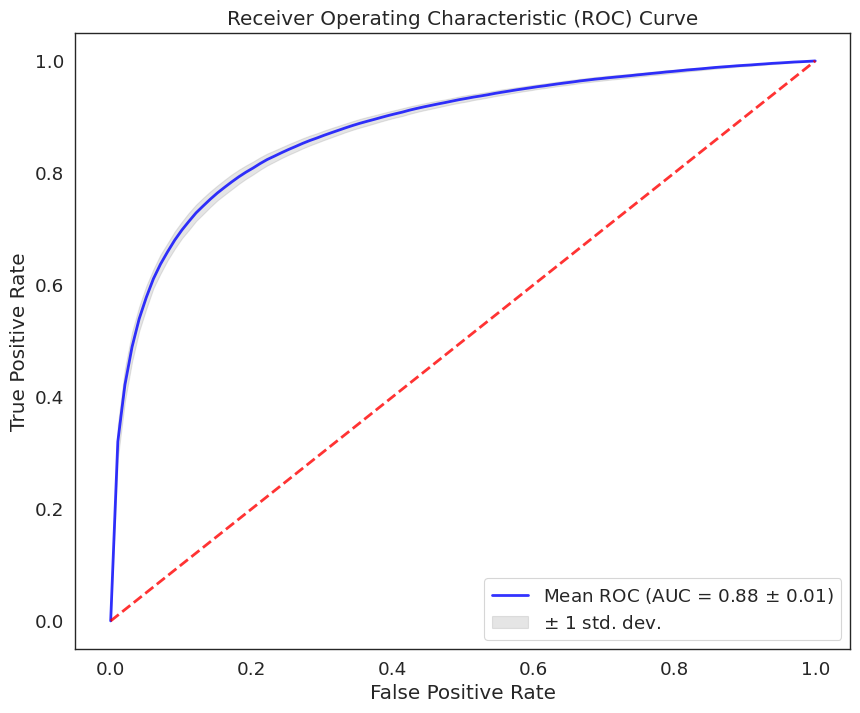

In [ ]:
# Get the best estimator
best_model = grid_search.best_estimator_

# Arrays to store the true positive rates, false positive rates, and ROC AUC scores
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Perform cross-validation again to collect ROC curve data
for train, test in cv.split(X_resampled, y_resampled):
    best_model.fit(X_resampled[train], y_resampled[train])
    y_prob = best_model.predict_proba(X_resampled[test])[:, 1]
    fpr, tpr, _ = roc_curve(y_resampled[test], y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Calculate the mean and standard deviation of the true positive rates
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)

# Plot the standard deviation of the ROC curves
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#### SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import BorderlineSMOTE

# Assuming you have a dataset X, y
# Apply SMOTE to balance the entire dataset
smote = BorderlineSMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Define your SVM model
clf = SVC(probability=True, random_state=42)

# Set up cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Set up hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=42),
             estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [ ]:
# Get the best estimator
best_model = grid_search.best_estimator_

# Perform cross-validation to get predictions
y_pred_proba = cross_val_predict(best_model, X_resampled, y_resampled, cv=cv, method='predict_proba', n_jobs=-1)[:, 1]

# Arrays to store the true positive rates, false positive rates, and ROC AUC scores
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Calculate ROC curve for each fold
for train, test in cv.split(X_resampled, y_resampled):
    best_model.fit(X_resampled[train], y_resampled[train])
    y_prob = best_model.predict_proba(X_resampled[test])[:, 1]
    fpr, tpr, _ = roc_curve(y_resampled[test], y_prob)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)

# Calculate the mean and standard deviation of the true positive rates
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

# Plot the mean ROC curve
plt.figure(figsize=(10, 8))
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=0.8)

# Plot the standard deviation of the ROC curves
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2,
                 label=r'$\pm$ 1 std. dev.')

# Plot settings
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

NameError: name 'grid_search' is not defined

0.73


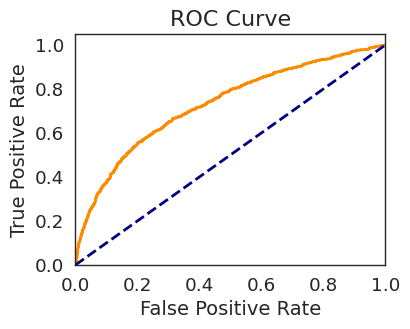

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)

# Calculate the AUC
roc_auc = auc(fpr_test, tpr_test)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.savefig('roc_oxpets_resnet50_aopc.pdf', format='pdf', bbox_inches='tight')
print(np.round(roc_auc,3))
with open('roc_oxpets_resnet50_aopc.pkl', 'wb') as f1:
    pickle.dump({'X_train': X_train, 'y_train': y_train,
                 'X_val':  X_val, 'y_val': y_val,
                 'X_test': X_test, 'y_test': y_test,
                 'optimal_threshold': optimal_threshold,
                 'y_scores_test': y_scores_test,
                 'y_pred_test': y_pred_test,
                 'best_params': grid_search.best_params_,
                 'roc_auc': roc_auc}, f1)

In [ ]:
!cp *.pkl drive/MyDrive/PhD/Results/sanity/final_results/
!cp *.pdf drive/MyDrive/PhD/Results/sanity/final_results/

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve
import numpy as np
import xgboost as xgb
from sklearn.metrics import roc_curve, auc


def remove_highly_correlated_features_pd(X, threshold):
    # Convert X to a pandas DataFrame
    # Calculate the correlation matrix
    df = pd.DataFrame(X)
    corr_matrix = df.corr().abs()
    # Create a mask to remove the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # Set the upper triangle values to NaN
    corr_matrix.mask(mask, inplace=True)

    # Find the highly correlated features
    cols_to_drop = [column for column in corr_matrix.columns if any(corr_matrix[column] > threshold)]

    # Drop the highly correlated features from the DataFrame
    reduced_df = df.drop(columns=cols_to_drop)

    # Convert the reduced DataFrame back to numpy array
    X_reduced = reduced_df.to_numpy()

    return X_reduced, cols_to_drop


def min_max_scaling1(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

def exponential_weightage(x):
    center = 0.5
    steepness = 20.0
    decay_rate = 10.0
        # Calculate the penalty using mirrored Gaussian components
    left_gaussian = np.exp(-steepness * (x - center) ** 2)
    sample_weight = 1-left_gaussian
    return sample_weight

def min_max_scaling(x):
    # Check if x is a single value
    if isinstance(x, (int, float)):
        # If x is a single value, return 0 (or any other default value)
        return 0  # You can choose any default value here
    # If x is iterable (e.g., Pandas Series or NumPy array), apply min-max scaling
    min_val = np.min(x)
    max_val = np.max(x)
    scaled_values = (x - min_val) / (max_val - min_val)
    return scaled_values

def cor_to_01(x):
    return (x+1)/2

sal_met_dir = 'res_cams/' #'res_cams/oxpets/xception/' #"res_sal_resnet_oxpets/"

files = os.listdir(sal_met_dir)

f1_scores_0 = []
f1_scores_1 = []

model = None
class_threshold = None

tr_files = files[0:500]
data_arr = []
for file in tr_files:
    file_path = sal_met_dir + file
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    faithfulness_dict = data[2]
    prob_diff_dict = data[3]

    cam_ranks_dict = {}
    arppd_dict = {}
    for key in faithfulness_dict.keys():
        cam_indices= np.argsort(np.array(list(faithfulness_dict[key].values())).flatten())[::-1]
        cam_ranks = np.array(list(faithfulness_dict[key].keys()))[cam_indices]
        #print(key + str(" : ") + str(cam_ranks))
        cam_ranks_dict[key] = cam_ranks
        prob_diffs = prob_diff_dict[key]
        arppd_dict[key] = len(prob_diffs[prob_diffs>=0])/len(prob_diffs)

    cam_res_dict = {}
    for key1, key2 in itertools.combinations(cam_ranks_dict.keys(), 2):
        similarity = rbo.RankingSimilarity(list(cam_ranks_dict[key1]), list(cam_ranks_dict[key2])).rbo_ext(p=0.2)
        # print(f"RBO similarity between {key1} and {key2}: {similarity}")
        res_key = key1 + '_' + key2
        cam_res_dict[res_key] = similarity

    for key1, key2 in itertools.combinations(prob_diff_dict.keys(), 2):
        similarity = rbo.RankingSimilarity(list(np.argsort(prob_diff_dict[key1])[::-1]),
                                           list(np.argsort(prob_diff_dict[key2])[::-1])).rbo_ext(p=0.2)
        # print(f"Perturbation Pixel RBO similarity between {key1} and {key2}: {similarity}")
        res_key = key1 + '_' + key2
        arppd1= arppd_dict[key1]
        arppd2=arppd_dict[key2]

        var1 = np.var(prob_diff_dict[key1])
        var2 = np.var(prob_diff_dict[key2])

        if np.isnan(var1) or np.isnan(var2):
            print("var nan")

        # Check if both variables have zero variance
        if var1 == 0 and var2 == 0:
            prob_diffs_cor = 1  # Assign correlation coefficient as 1 if both have no variance
        elif var1 == 0 or var2 == 0:
            prob_diffs_cor = 0  # Assign correlation coefficient as 0 if one has no variance
        else:
            # Calculate the correlation coefficient using np.corrcoef
            prob_diffs_cor = np.corrcoef(prob_diff_dict[key1], prob_diff_dict[key2])[0, 1]

        if np.isnan(prob_diffs_cor):
            print("Nan")

        var1 = np.var(prob_diff_dict[key1])
        var2 = np.var(prob_diff_dict[key2])
        med1 = np.mean(prob_diff_dict[key1])
        med2 = np.mean(prob_diff_dict[key2])
        mu1 = np.mean(prob_diff_dict[key1])
        mu2 = np.mean(prob_diff_dict[key2])
        kurt1 = kurtosis(prob_diff_dict[key1])
        kurt2 =  kurtosis(prob_diff_dict[key2])
        skew1 = skew(prob_diff_dict[key1])
        skew2 = skew(prob_diff_dict[key2])
        cam_rank_target = cam_res_dict[res_key]
        data_arr.append([similarity, arppd1, arppd2, prob_diffs_cor, var1, var2, cam_rank_target])

df = pd.DataFrame(data_arr, columns=['Similarity', 'arppd1', 'arppd2', 'prob_diffs_cor', 'var1', 'var2', 'cam_rank_target'])
X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2']] #'prob_diffs_cor',
y = df['cam_rank_target']
y = (y>0.5).astype(int)

var1_scaled = min_max_scaling(X['var1'])
X.loc[:, 'var1'] = var1_scaled
var2_scaled = min_max_scaling(X['var2'])
X.loc[:, 'var2'] = var2_scaled

# Assuming you have a dataset X, y
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Optional: Create a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

smote = BorderlineSMOTE() #SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)
# Define your model and perform grid search (using X_train, y_train)
clf = xgb.XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
param_grid = {
        'n_estimators': [200, 500],  # number of trees
        'max_depth': [6, 9],  #
        #'learning_rate': [0.01, 0.1, 0.3],  #
        #'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75],
        #'colsample_bylevel': [0.5, 0.75, 1.0],
        #'gamma': [0, 0.1, 0.3],
        'reg_alpha': [0.01, 0.1, 0.5],
        'reg_lambda': [0.1, 0.5, 0.75],
        #'scale_pos_weight': [3, 5, 7]
    }
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Find the optimal threshold using Youden's J (using X_val, y_val or through cross-validation on X_train)
y_scores_val = grid_search.best_estimator_.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_scores_val)
j_statistic = tpr - fpr
optimal_index = np.argmax(j_statistic)
optimal_threshold = thresholds[optimal_index]

# Evaluate the final model and threshold on the test set (using X_test, y_test)
y_scores_test = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
y_pred_test = (y_scores_test >= optimal_threshold).astype(int)

print("Optimal threshold according to Youden's J:", optimal_threshold)
# Output your evaluation metrics for the test set

<ipython-input-33-a6dc4330b44d>:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'var1'] = var1_scaled
<ipython-input-33-a6dc4330b44d>:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'var2'] = var2_scaled


Optimal threshold according to Youden's J: 0.46884215


0.694


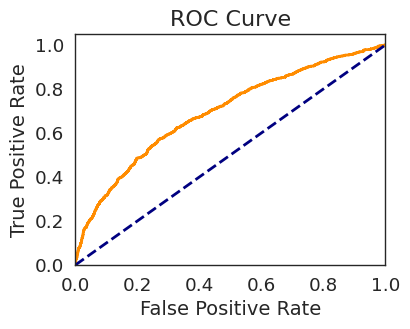

In [ ]:
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_scores_test)

# Calculate the AUC
roc_auc = auc(fpr_test, tpr_test)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.savefig('roc_oxpets_resnet50_aopc.pdf', format='pdf', bbox_inches='tight')
print(np.round(roc_auc,3))
with open('roc_oxpets_resnet50_aopc.pkl', 'wb') as f1:
    pickle.dump({'X_train': X_train, 'y_train': y_train,
                 'X_val':  X_val, 'y_val': y_val,
                 'X_test': X_test, 'y_test': y_test,
                 'optimal_threshold': optimal_threshold,
                 'y_scores_test': y_scores_test,
                 'y_pred_test': y_pred_test,
                 'best_params': grid_search.best_params_,
                 'roc_auc': roc_auc}, f1)


In [ ]:
!cp roc*.pkl drive/MyDrive/PhD/Results/sanity/final_results/
!cp roc*.pdf drive/MyDrive/PhD/Results/sanity/final_results/

In [ ]:
best_params = grid_search.best_params_
best_alpha = best_params['reg_alpha']
best_lambda = best_params['reg_lambda']
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_colsample_bytree = best_params['colsample_bytree']

clf = xgb.XGBClassifier(reg_alpha=best_alpha, reg_lambda=best_lambda, n_estimators=best_n_estimators,
                        max_depth=best_max_depth, colsample_bytree=best_colsample_bytree, scale_pos_weight= 3)

clf.fit(X,y)

feature_importance=clf.feature_importances_

feature_names = ['Similarity', 'arppd1', 'arppd2']  # Assuming X is your DataFrame containing features
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Print or visualize the feature importance scores
print(feature_importance_dict)


{'Similarity': 0.4496411, 'arppd1': 0.28087702, 'arppd2': 0.2694819}


In [ ]:
#Regression
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import make_scorer, mean_squared_error

X = df[['Similarity', 'arppd1', 'arppd2', 'var1', 'var2']]
y = df['cam_rank_target']

X.loc[:, 'var1'] = min_max_scaling(df['var1'])
X.loc[:, 'var2'] = min_max_scaling(df['var2'])
#X.loc[:, 'prob_diffs_cor'] = df['prob_diffs_cor'].apply(lambda x: cor_to_01(x))

X_reduced, removed_feature_names = remove_highly_correlated_features_pd(X, 0.8)
#print("removed feats:", removed_feature_names)
X = X_reduced

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_grid = {
        'n_estimators': [200, 500],  # Example values for number of trees
        'max_depth': [6, 9],  # Example values for tree depth
        'colsample_bytree': [0.5, 0.75],
        'reg_alpha': [0.01, 0.1, 0.5],
        'reg_lambda': [0.1, 0.5, 0.75],
    }

# Scoring metric (Root Mean Squared Error)
scoring = 'neg_root_mean_squared_error'

clf = xgb.XGBRegressor()  # Change to XGBRegressor for regression

# Initialize repeated k-fold cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=cv, scoring=scoring, refit=True)
grid_search.fit(X_train, y_train)

# Results
print("Best hyperparameters:", grid_search.best_params_)
print("Root mean squared error:", -grid_search.best_score_)

<ipython-input-37-7937c6962ec9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'var1'] = min_max_scaling(df['var1'])
<ipython-input-37-7937c6962ec9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'var2'] = min_max_scaling(df['var2'])


Best hyperparameters: {'colsample_bytree': 0.75, 'max_depth': 9, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 0.75}
Root mean squared error: 0.38829268763074104


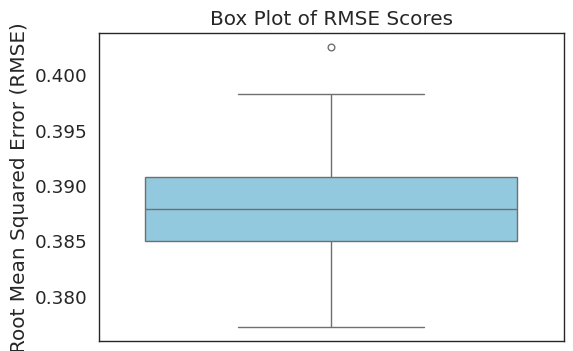

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to 'white' to remove background and grid lines
sns.set_style("white")

sns.set_context("paper", font_scale=1.5)  # Adjust the font scale as needed

rmse_scores = []
for i in range(50):  # Assuming you have 50 splits
    mean_rmse_score = grid_search.cv_results_[f'split{i}_test_score'][grid_search.best_index_]
    rmse_scores.append(-mean_rmse_score)  # Negative because scoring was 'neg_root_mean_squared_error'

# Create box plot for RMSE scores
plt.figure(figsize=(6, 4))
sns.boxplot(data=rmse_scores, color='skyblue')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Box Plot of RMSE Scores')
plt.savefig('rmse_scores_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

with open('rmse_scores_aopc.pkl', 'wb') as f:
    pickle.dump({'rmse_scores': rmse_scores, 'best_params': grid_search.best_params_}, f)

In [ ]:
!cp drive/MyDrive/PhD/Results/sanity/final_results/rmse_scores_faithfulness.pkl .

with open('rmse_scores_faithfulness.pkl', 'rb') as f:
    # Load the pickled data
    rmse_scores_faithfulness = pickle.load(f)

In [ ]:
np.array(list(rmse_scores_faithfulness.values())[0])

array([0.3956563 , 0.39899308, 0.39560666, 0.39494492, 0.39476819,
       0.3982724 , 0.39379869, 0.39296434, 0.38700877, 0.40109079,
       0.39694048, 0.39446859, 0.39123315, 0.39759129, 0.38988638,
       0.39513685, 0.396093  , 0.40072957, 0.39195277, 0.39910502,
       0.39018522, 0.40677836, 0.39809389, 0.39822424, 0.39144626,
       0.39290693, 0.39037406, 0.39235304, 0.39541415, 0.39349203,
       0.39406429, 0.39315757, 0.40024793, 0.395042  , 0.39743027,
       0.39226264, 0.39247287, 0.40212451, 0.39319047, 0.40123974,
       0.39654014, 0.39723861, 0.39612547, 0.39477348, 0.39448972,
       0.39600191, 0.39411986, 0.39588463, 0.40006762, 0.39848373])

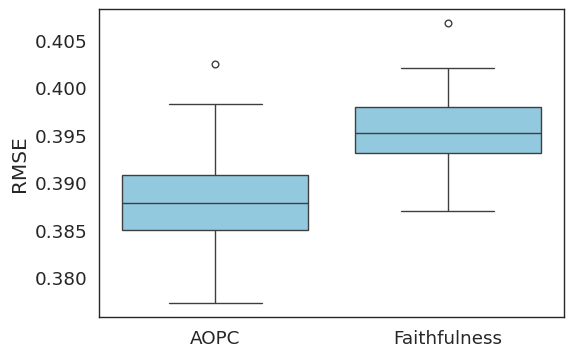

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style to 'white' to remove background and grid lines
sns.set_style("white")
sns.set_context("paper", font_scale=1.5)  # Adjust the font scale as needed

plt.figure(figsize=(6, 4))
sns.boxplot(data=[rmse_scores, np.array(list(rmse_scores_faithfulness.values())[0])], color='skyblue')
plt.ylabel('RMSE')
plt.xticks([0, 1], ['AOPC', 'Faithfulness'])
#plt.title('Box Plot of RMSE Scores')
plt.savefig('rmse_scores_plot_oxpets_resnet.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
!cp rmse_scores_plot_oxpets_resnet.pdf drive/MyDrive/PhD/Results/sanity/final_results/

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.75,
 'max_depth': 9,
 'n_estimators': 200,
 'reg_alpha': 0.5,
 'reg_lambda': 0.75}

In [ ]:
model = xgb.XGBRegressor(**grid_search.best_params_)

# Fit the model to the training data
model.fit(X_train, y_train)
pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(pred, y_test))
print(rmse)

0.3840656356638582


0.40120966689158716
